# EDA - Análisis Exploratorio de Datos

En esta sección se realiza un Análisis Exploratorio de Datos (EDA) para entender mejor las características y la estructura del dataset. El EDA es fundamental para identificar patrones, relaciones y posibles anomalías en los datos antes de aplicar cualquier modelo de machine learning o análisis estadístico avanzado.

- **Objetivo del EDA**: Proporcionar una comprensión inicial del dataset y su distribución, así como explorar las relaciones entre las variables.
- **Fases del EDA**:

   1. **Comprensión del Dataset**:
      - Revisión de la estructura del dataset (dimensiones, tipos de datos, y nombres de columnas).
      - Identificación de valores faltantes y conteo de registros completos.

   2. **Análisis Univariado**:
      - Visualización y análisis de la distribución de cada variable individual.
      - Cálculo de medidas de tendencia central (media, mediana) y dispersión (varianza, desviación estándar).
      - Identificación de valores atípicos.

   3. **Análisis Bivariado**:
      - Exploración de la relación entre pares de variables, usando gráficos de dispersión y gráficos de caja.
      - Evaluación de la fuerza y dirección de las relaciones entre variables numéricas mediante métricas como la correlación.

   4. **Análisis Multivariado** (opcional):
      - Evaluación de las interacciones entre múltiples variables simultáneamente.
      - Uso de gráficos como pairplots y análisis de componentes principales (PCA) si es necesario.

   5. **Tratamiento de Valores Faltantes**:
      - Decisión sobre la imputación o eliminación de valores faltantes, dependiendo de su proporción y relevancia.

   6. **Transformación de Variables**:
      - Transformación de variables categóricas a numéricas mediante codificación (por ejemplo, one-hot encoding o label encoding).
      - Aplicación de transformaciones para normalizar o escalar variables numéricas si es necesario.

   7. **Identificación de Correlaciones**:
      - Cálculo y visualización de la matriz de correlación para entender las relaciones entre variables numéricas.
      - Detección de variables redundantes o altamente correlacionadas.


___
### Importar Librerías

En esta sección se importan las librerías necesarias para el análisis exploratorio de datos (EDA) y visualización:
- `pandas`: Para manipulación y análisis de datos estructurados en forma de DataFrames.
- `numpy`: Para cálculos numéricos de alto rendimiento y operaciones sobre matrices.
- `matplotlib`: Para crear gráficos personalizados y ajustar el diseño de las visualizaciones.
- `seaborn`: Para visualización de datos estadísticos, construido sobre `matplotlib`.

In [1]:
# Importar las librerías necesarias para el análisis y visualización de datos

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

___
### Configuraciones Iniciales

En esta sección se establecen las configuraciones generales, de estilo y contexto para las visualizaciones:
- Definir el estilo de las gráficas para asegurar consistencia visual.
- Configurar parámetros de color y tamaño para las visualizaciones.
- Especificar rutas de acceso a los datos, asegurando que la carga de archivos sea sencilla y modular.
- Configuración de pandas para columnas y renglones.
- Todo lo necesario para la utilización en el resto del cuaderno.

In [2]:
# Configuración de estilo y contexto para las gráficas
%matplotlib inline
sns.set_style(style='whitegrid')  # Define un estilo de cuadrícula blanca para las gráficas
sns.set_context(context='notebook')  # Establece el contexto de visualización adecuado para notebooks
plt.rcParams['figure.figsize'] = (11, 9.4)  # Tamaño predeterminado de las figuras

# Colores personalizados para categorías específicas (ajustar según las necesidades del análisis)
categoria_color = {
    'Categoria1': '#ff6602ff',
    'Categoria2': '#0f7175ff',
    'Categoria3': '#c65dc9ff',
}

# Ruta de acceso a los datos y función de carga de archivos
DATA_PATH = "../data/"  # Modificar según la estructura de carpetas
cargar_datos = lambda nombre_archivo, carpeta: pd.read_csv(f"{DATA_PATH}{carpeta}/{nombre_archivo}.csv")  # Carga de archivos CSV
guardar_datos = lambda nombre_archivo, carpeta, df: df.to_csv(f"{DATA_PATH}{carpeta}/{nombre_archivo}.csv", index=False)  # Guadar de archivos CSV

___
### Carga de Datos

En esta sección se carga el conjunto de datos desde archivos para su análisis. También se realiza una revisión básica para:
- Identificar la estructura general del dataset.


In [3]:
# Cargar y visualizar los datos crudos
raw_penguins_df = cargar_datos("raw_penguins", "raw")
raw_penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


___
### Inspección de Datos

En esta sección se inspeccionan los datos para entender la estructura de las columnas, tipos de datos y valores nulos, con el fin de identificar posibles problemas en el dataset.

In [4]:
# Inspección general del DataFrame crudo para revisar tipos de datos y valores nulos en las columnas
raw_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

#### Diccionario de variables

Se genera el diccionario de variables para entender mejor los datos, puede ser anteriormente proporcionado o generado durante el proceso.

| Variable                | Tipo de Dato | Descripción                                                                                         |
|-------------------------|--------------|-----------------------------------------------------------------------------------------------------|
| `studyName`             | object       | Nombre del estudio al que pertenece cada registro.                                                  |
| `Sample Number`         | int64        | Número de muestra única asignado a cada registro.                                                   |
| `Species`               | object       | Especie del pingüino (por ejemplo, Adelie, Gentoo, Chinstrap).                                      |
| `Region`                | object       | Región geográfica donde se tomó la muestra.                                                         |
| `Island`                | object       | Isla específica donde se encontró al pingüino (por ejemplo, Torgersen, Biscoe, Dream).              |
| `Stage`                 | object       | Etapa de vida o fase reproductiva del pingüino en el momento de la muestra.                         |
| `Individual ID`         | object       | Identificador único asignado a cada pingüino.                                                       |
| `Clutch Completion`     | object       | Información sobre si el pingüino completó la puesta de huevos.                                      |
| `Date Egg`              | object       | Fecha de puesta del huevo (en formato de texto).                                                    |
| `Culmen Length (mm)`    | float64      | Longitud del pico o culmen en milímetros.                                                           |
| `Culmen Depth (mm)`     | float64      | Profundidad del pico o culmen en milímetros.                                                        |
| `Flipper Length (mm)`   | float64      | Longitud de la aleta en milímetros.                                                                 |
| `Body Mass (g)`         | float64      | Masa corporal en gramos.                                                                            |
| `Sex`                   | object       | Sexo del pingüino (masculino o femenino).                                                           |
| `Delta 15 N (o/oo)`     | float64      | Relación isotópica de Nitrógeno-15 en partes por mil (‰), relacionada con la dieta del pingüino.    |
| `Delta 13 C (o/oo)`     | float64      | Relación isotópica de Carbono-13 en partes por mil (‰), también relacionada con la dieta.           |
| `Comments`              | object       | Comentarios adicionales o notas relevantes para algunos registros.                                  |

In [5]:
# Visualizar los tipos de datos de cada columna (opción alternativa a .info())
raw_penguins_df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [6]:
# Contar el número de columnas por tipo de dato para tener una idea general de la estructura
raw_penguins_df.dtypes.value_counts()

object     10
float64     6
int64       1
Name: count, dtype: int64

___
### Procesamiento de las Variables

En esta sección se procesan las variables para cumplir con un estándar de nomenclatura y facilitar el análisis.
- Se formatean los nombres de las columnas para asegurar consistencia.
- Se seleccionan las columnas más relevantes.
- Se genera una columna adicional con el año a partir de una fecha.

A continuación, se muestra la lista de columnas seleccionadas para conservar, junto con sus nuevos nombres ajustados al estándar de nomenclatura:
- Species -> species
- Island -> island
- Culmen Length (mm) -> bill_length_mm
- Culmen Depth (mm) -> bill_depth_mm
- Flipper Length (mm)  -> flipper_length_mm
- Body Mass (g) -> body_mass_g
- Sex -> sex
- Species -> species

Se extrae únicamente el año de una columna específica, generando una nueva columna con este valor:

- Date Egg -> year


In [7]:
# Verificar el total de registros (filas) y columnas en el DataFrame
raw_penguins_df.shape

(344, 17)

In [8]:
# Validación de columnas con valores nulos o faltantes
raw_penguins_df.isnull().any()

studyName              False
Sample Number          False
Species                False
Region                 False
Island                 False
Stage                  False
Individual ID          False
Clutch Completion      False
Date Egg               False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
Delta 15 N (o/oo)       True
Delta 13 C (o/oo)       True
Comments                True
dtype: bool

In [9]:
# Conteo de valores nulos o faltantes por columna
(
    raw_penguins_df
    .isnull()
    .sum()
).sort_values(ascending=False)

Comments               290
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Sex                     11
Culmen Length (mm)       2
Body Mass (g)            2
Flipper Length (mm)      2
Culmen Depth (mm)        2
studyName                0
Sample Number            0
Clutch Completion        0
Individual ID            0
Stage                    0
Island                   0
Region                   0
Species                  0
Date Egg                 0
dtype: int64

Text(-105.81377314814812, 0.5, 'Columnas')

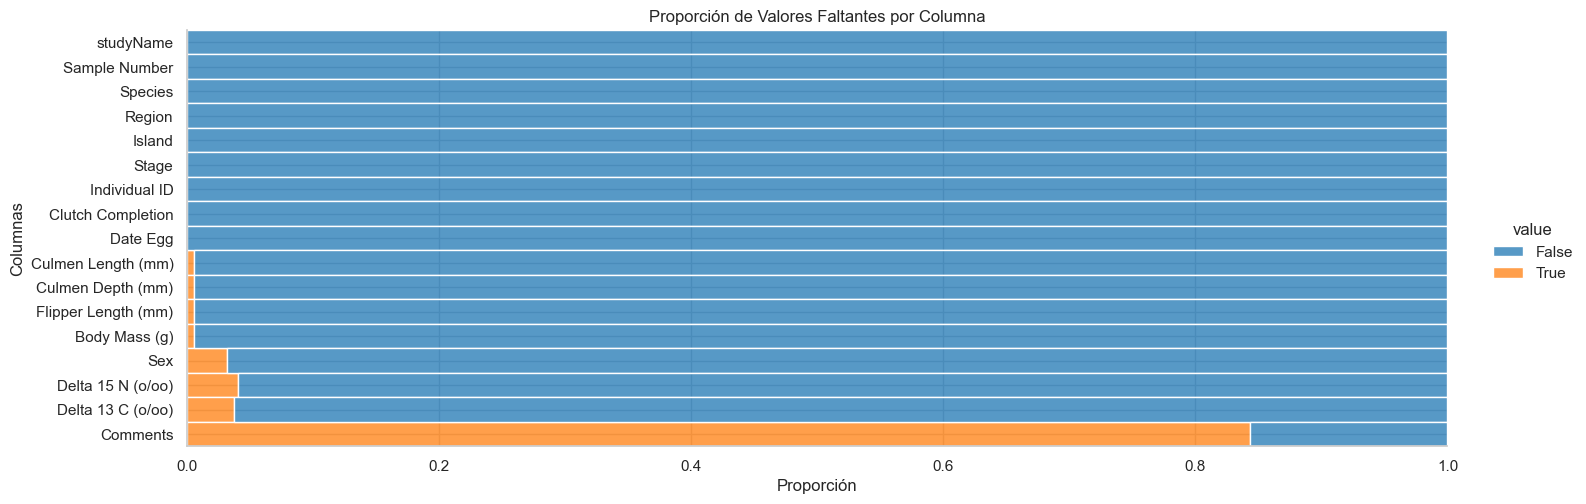

In [10]:
# Proporción de valores faltantes por columnas
missing_values = raw_penguins_df.isnull().melt()  # Transformación de datos faltantes para visualización

# Gráfico de proporción de valores faltantes
sns.displot(
    data=missing_values,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=3
)
plt.title("Proporción de Valores Faltantes por Columna")
plt.xlabel("Proporción")
plt.ylabel("Columnas")


In [11]:
# Número de registros con y sin valores faltantes
total_rows = len(raw_penguins_df)
total_without_nulls = len(raw_penguins_df.dropna())

# Mostrar resultados
print(f"Total rows: {total_rows}")
print(f"Total rows without nulls: {total_without_nulls}")
print(f"Difference: {total_rows - total_without_nulls} ({100 * (1 - (total_without_nulls / total_rows)):.2f}%)")

Total rows: 344
Total rows without nulls: 34
Difference: 310 (90.12%)


#### Hallazgos de Valores Faltantes

- La mayoría de las columnas no presentan valores faltantes, lo cual es favorable para el análisis.
- **Valores faltantes notables**:
  - `Sex`: Algunos valores faltantes; evaluar imputación o eliminación.
  - `Delta 15 N (o/oo)` y `Delta 13 C (o/oo)`: Proporción significativa de faltantes, importante considerar imputación si son variables clave.
  - `Comments`: Más del 80% de valores faltantes; podría eliminarse sin afectar el análisis.

**Recomendación**: Evaluar imputación o eliminación para `Sex`, `Delta 15 N (o/oo)`, y `Delta 13 C (o/oo)`. `Comments` podría descartarse debido a la alta proporción de faltantes.

In [12]:
# Vista de estadísticos básicos de los registros
raw_penguins_df.describe().T  # Transponer para facilitar la lectura de estadísticas por columna

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),342.0,43.921930,5.459584,32.10000,39.225000,44.450000,48.500000,59.60000
Culmen Depth (mm),342.0,17.151170,1.974793,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),342.0,200.915205,14.061714,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),342.0,4201.754386,801.954536,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),330.0,8.733382,0.551770,7.63220,8.299890,8.652405,9.172123,10.02544
Delta 13 C (o/oo),331.0,-25.686292,0.793961,-27.01854,-26.320305,-25.833520,-25.062050,-23.78767


#### Resumen Estadístico de las Variables Numéricas

- **Sample Number**: La media es de 63.15 con un rango entre 1 y 152. Esta variable representa un identificador numérico sin relevancia analítica directa.
- **Culmen Length (mm)**: Longitud promedio del pico de 43.92 mm, con valores que van de 32.1 mm a 59.6 mm. La variabilidad es moderada (std: 5.46).
- **Culmen Depth (mm)**: Profundidad promedio del pico de 17.15 mm, con valores entre 13.1 mm y 21.5 mm. Tiene una dispersión baja (std: 1.97).
- **Flipper Length (mm)**: Longitud promedio de la aleta de 200.92 mm, con valores entre 172 mm y 231 mm. Se observa una variabilidad moderada (std: 14.06).
- **Body Mass (g)**: Masa corporal promedio de 4201.75 g, con un rango amplio entre 2700 g y 6300 g, lo cual indica alta dispersión (std: 801.95).
- **Delta 15 N (o/oo)**: Valor promedio de 8.73, con valores entre 7.63 y 10.03. La variabilidad es baja (std: 0.55).
- **Delta 13 C (o/oo)**: Valor promedio de -25.69, con un rango entre -27.02 y -23.79. También presenta baja variabilidad (std: 0.79).

**Conclusión**: Las variables `Body Mass (g)` y `Flipper Length (mm)` tienen una mayor variabilidad, lo que indica una amplia dispersión en los datos, mientras que las variables isotópicas (`Delta 15 N` y `Delta 13 C`) muestran menor dispersión.


___
### Procesamiento de las Variables

En esta sección se procesan las variables para cumplir con un estándar de nomenclatura y facilitar el análisis.
- Se formatean los nombres de las columnas para asegurar consistencia.
- Se seleccionan las columnas más relevantes.
- Se genera una columna adicional con el año a partir de una fecha.

A continuación, se muestra la lista de columnas seleccionadas para conservar, junto con sus nuevos nombres ajustados al estándar de nomenclatura:
- Species -> species
- Island -> island
- Culmen Length (mm) -> bill_length_mm
- Culmen Depth (mm) -> bill_depth_mm
- Flipper Length (mm)  -> flipper_length_mm
- Body Mass (g) -> body_mass_g
- Sex -> sex
- Species -> species

Se extrae únicamente el año de una columna específica, generando una nueva columna con este valor:

- Date Egg -> year


In [13]:
# Obtención de diccionarios para hacer el mapeo

# Obtener los valores únicos de la columna 'Species' para crear un diccionario de mapeo
unique_species = raw_penguins_df['Species'].unique()
print(f"Valores únicos en 'Species': {unique_species}\n")

# Obtener los valores únicos de la columna 'Island' para crear un diccionario de mapeo
unique_island = raw_penguins_df['Island'].unique()
print(f"Valores únicos en 'Island': {unique_island}\n")

# Obtener los valores únicos de la columna 'Sex' para crear un diccionario de mapeo
unique_sex = raw_penguins_df['Sex'].unique()
print(f"Valores únicos en 'Sex': {unique_sex}")

Valores únicos en 'Species': ['Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)']

Valores únicos en 'Island': ['Torgersen' 'Biscoe' 'Dream']

Valores únicos en 'Sex': ['MALE' 'FEMALE' nan]


In [14]:
# Generación de diccionarios para mapeo
# Estos diccionarios simplifican los valores únicos de las columnas 'Species' y 'Sex' en nombres más claros.

# Diccionario para mapear nombres científicos de especies a nombres comunes
species_dict = {
    'Adelie Penguin (Pygoscelis adeliae)': "Adelie",     # Mapeo a nombre común "Adelie"
    'Gentoo penguin (Pygoscelis papua)': "Gentoo",       # Mapeo a nombre común "Gentoo"
    'Chinstrap penguin (Pygoscelis antarctica)': "Chinstrap",  # Mapeo a nombre común "Chinstrap"
}

# Diccionario para mapear valores de sexo a formato en minúsculas
sex_dict = {
    "MALE": "male",       # Mapeo de "MALE" a "male"
    "FEMALE": "female",   # Mapeo de "FEMALE" a "female"
}

In [15]:
# Selección de columnas relevantes
# Seleccionamos las columnas necesarias para el análisis y creamos una copia del DataFrame original
selected_columns = ['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
                    'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Date Egg']
processed_penguins_df = raw_penguins_df[selected_columns].copy()

# Renombrar columnas para seguir un estándar de nombres en minúsculas y con guiones bajos
# Esto facilita la lectura y uso de las variables en el análisis
column_rename_map = {
    'Species': 'species',
    'Island': 'island',
    'Culmen Length (mm)': 'bill_length_mm',      # Longitud del pico en mm
    'Culmen Depth (mm)': 'bill_depth_mm',        # Profundidad del pico en mm
    'Flipper Length (mm)': 'flipper_length_mm',  # Longitud de la aleta en mm
    'Body Mass (g)': 'body_mass_g',              # Masa corporal en gramos
    'Sex': 'sex',
    'Date Egg': 'year'                           # Fecha del huevo
}
processed_penguins_df.rename(columns=column_rename_map, inplace=True)

# Procesamiento de la columna "year" extrayendo solo el año
# Convertimos la columna "year" a formato datetime y extraemos solo el año
processed_penguins_df['year'] = pd.to_datetime(processed_penguins_df['year'], errors='coerce').dt.year

# Aplicar mapeo de valores únicos usando los diccionarios creados previamente
# Estos diccionarios simplifican los valores de 'species' y 'sex' para facilitar el análisis
processed_penguins_df['species'] = processed_penguins_df['species'].map(species_dict)
processed_penguins_df['sex'] = processed_penguins_df['sex'].map(sex_dict)

# Vista preliminar de los datos procesados
processed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
guardar_datos("preprocess_penguins", "processed", processed_penguins_df)

___
### Validación de Variables Procesadas

En esta sección se revisan las variables procesadas para asegurar que los cambios realizados durante el procesamiento se aplicaron correctamente. Esto incluye:

- **Confirmación de los nombres de las columnas**: Verificar que todas las columnas fueron renombradas según el estándar de nombres en minúsculas y con guiones bajos.
- **Revisión de las variables mapeadas**: Validar que los valores en las columnas `species` y `sex` se han mapeado correctamente de acuerdo con los diccionarios definidos, reduciendo así la complejidad en los valores únicos.
- **Validación del formato de año**: Asegurarse de que la columna `year` contiene solo valores de año, derivados de la columna de fecha original.

In [17]:
# Datos procesados
preprocess_penguins_df =  cargar_datos("preprocess_penguins", "processed")

preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Total de registros: 344
Total de registros sin valores faltantes: 333
Diferencia: 11 (3.20%)


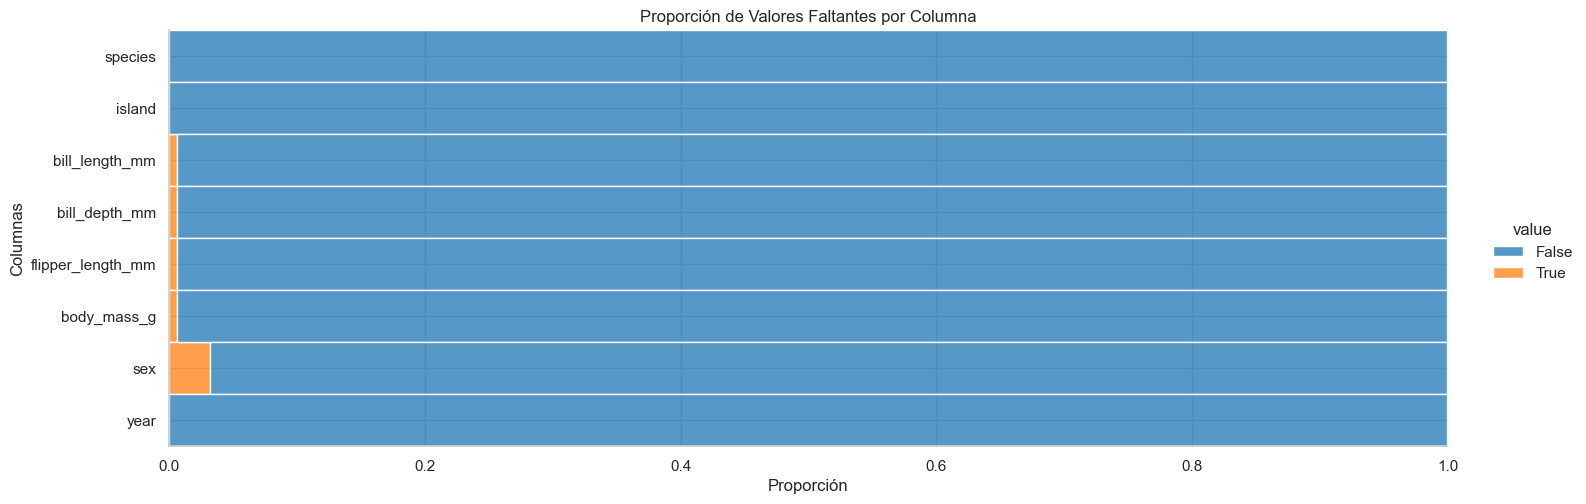

In [18]:
# Proporción de valores faltantes por columnas
# Transformamos los valores nulos para visualizarlos como proporciones por columna
(
    processed_penguins_df
    .isnull()
    .melt()  # Transformación para mostrar cada columna y sus valores nulos como proporción
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=3
            )
        )
    )
)

# Personalizar el gráfico con título y etiquetas
plt.title("Proporción de Valores Faltantes por Columna")
plt.xlabel("Proporción")
plt.ylabel("Columnas")

# Conteo de registros completos (sin valores faltantes)
# Calculamos el total de filas con y sin valores nulos para conocer la cantidad de registros válidos
total_rows = len(processed_penguins_df)
total_without_nulls = len(processed_penguins_df.dropna())

# Mostrar la diferencia de registros
print(f"Total de registros: {total_rows}")
print(f"Total de registros sin valores faltantes: {total_without_nulls}")
print(f"Diferencia: {total_rows - total_without_nulls} ({100 * (1 - (total_without_nulls / total_rows)):.2f}%)")

#### Hallazgos de Valores Faltantes

- La mayoría de las columnas no presentan valores faltantes, lo cual es favorable para el análisis.
- **Valores faltantes notables**:
  - `sex`: Contiene una pequeña proporción de valores faltantes (3.20%), lo que equivale a 11 registros de un total de 344. 

**Recomendación**: Dado que solo el 3.20% de los registros tienen valores faltantes en la columna `sex`, se podría considerar la imputación o eliminación de estos registros para mantener la integridad del análisis, ya que el resto de las variables están completas.

#### Eliminación de Datos Faltantes

Se eliminan los datos faltantes ya que representan menos del 5% del total de registros. Esta cantidad es suficientemente baja para que la eliminación no afecte la calidad del análisis.

- **Justificación**: Cuando el porcentaje de valores faltantes es bajo (menor al 5%), es común proceder con su eliminación en lugar de aplicar técnicas de imputación, ya que el impacto en el análisis es mínimo.
- **Impacto en los datos**: Este proceso asegura que el análisis se realice únicamente con registros completos, evitando posibles sesgos generados por valores faltantes.

In [19]:
# Eliminación de datos faltantes
penguins_df = preprocess_penguins_df.dropna()

# Vista del DataFrame después de la eliminación de datos faltantes
penguins_df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


___
## Análisis Univariado

En esta sección se exploran las distribuciones individuales de cada variable en el dataset. El análisis univariado permite entender la variabilidad, la dispersión y la presencia de posibles valores atípicos en cada variable.

- **Objetivo**: Evaluar la distribución de cada variable para identificar patrones, sesgos o valores extremos.
- **Métodos comunes**: Se utilizarán gráficos de histogramas, diagramas de caja (boxplots) y medidas estadísticas básicas (como la media, mediana y desviación estándar) para cada variable.
- **Importancia**: Esta evaluación preliminar proporciona una visión general de cada variable antes de analizar las relaciones entre ellas en análisis bivariados o multivariados.


#### Análisis Estadístico Básico de las Variables

En esta sección se calculan estadísticas descriptivas para cada variable del dataset. Estas estadísticas incluyen medidas de tendencia central y dispersión, como la media, mediana, desviación estándar, valores mínimos y máximos.

- **Objetivo**: Obtener un resumen numérico de cada variable para comprender mejor su comportamiento y rango de valores.
- **Medidas incluidas**: Se calcularán la media, mediana, desviación estándar, percentiles, y valores extremos (mínimo y máximo).
- **Relevancia**: Este análisis estadístico proporciona un contexto inicial que ayuda a identificar variables con alta o baja variabilidad, así como posibles valores atípicos que podrían requerir un tratamiento adicional.


In [20]:
# Descripción de todas las columnas, numéricas y categóricas
# Usamos `include='all'` para obtener estadísticas descriptivas de todas las variables, tanto numéricas como categóricas.
# Transponemos el resultado para facilitar la lectura de cada estadístico en relación a las columnas.
penguins_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,333,3,Adelie,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,333,3,Biscoe,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,333.0,NaN,NaN,NaN,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,NaN,NaN,NaN,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,NaN,NaN,NaN,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,NaN,NaN,NaN,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,333.0,NaN,NaN,NaN,2008.042042,0.812944,2007.0,2007.0,2008.0,2009.0,2009.0


In [21]:
# Descripción de solo las columnas numéricas
# Usamos `include=np.number` para obtener estadísticas descriptivas únicamente de las variables numéricas,
# lo cual permite enfocarnos en las medidas de tendencia central y dispersión de estas variables.
penguins_df.describe(include=np.number).T 


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
year,333.0,2008.042042,0.812944,2007.0,2007.0,2008.0,2009.0,2009.0


In [22]:
# Descripción de solo las columnas categóricas
# Usamos `include=object` para obtener estadísticas descriptivas de las variables categóricas,
# permitiéndonos ver la cantidad de valores únicos, la moda y la frecuencia de las categorías.
penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [23]:
# Valores que más se repiten (Moda)
# Usamos `mode()` para obtener el valor más frecuente en cada columna, tanto para variables numéricas como categóricas.
# En caso de múltiples modas, `mode()` devolverá más de un valor por columna.
  # Utilizamos .iloc[0] para obtener solo la primera moda si hay varias
penguins_df.mode().iloc[0]

species              Adelie
island               Biscoe
bill_length_mm         41.1
bill_depth_mm          17.0
flipper_length_mm     190.0
body_mass_g          3800.0
sex                    male
year                   2009
Name: 0, dtype: object

#### Resumen Estadístico de las Variables

- **species**: Hay 333 registros no nulos distribuidos en 3 especies, siendo la especie más frecuente `Adelie` con 146 individuos.
- **island**: Existen 3 islas en el dataset con 333 registros no nulos, y la isla más frecuente es `Biscoe` con 163 registros.
- **bill_length_mm**: Longitud media del pico de 43.99 mm, con una variabilidad moderada (std: 5.47 mm) y un rango que va de 32.1 mm a 59.6 mm.
- **bill_depth_mm**: Profundidad media del pico de 17.16 mm, con baja dispersión (std: 1.97 mm) y valores que oscilan entre 13.1 mm y 21.5 mm.
- **flipper_length_mm**: Longitud media de la aleta de 200.97 mm, con una variabilidad moderada (std: 14.02 mm) y un rango de 172 mm a 231 mm.
- **body_mass_g**: Masa corporal promedio de 4207.06 g, con alta dispersión (std: 805.22 g) y un rango que va desde 2700 g hasta 6300 g.
- **sex**: Hay 333 registros no nulos de la variable `sex`, con 2 categorías (`male` y `female`). La categoría más frecuente es `male` con 168 registros.
- **year**: Año promedio de muestreo es 2008, con baja variabilidad (std: 0.81), y un rango de años entre 2007 y 2009.

**Conclusión**: La mayoría de las variables muestran valores consistentes y distribuciones razonables. La alta frecuencia de ciertas especies e islas puede influir en el análisis, mientras que las variables numéricas como `body_mass_g` presentan una mayor variabilidad que podría ser relevante en estudios de diferencias individuales o entre especies.


___
### Visualización de distribución de las variables

In [24]:
# Convertir columnas a tipo 'category' para optimizar memoria y mejorar el rendimiento
# Cambiamos 'species', 'island' y 'sex' a tipo categórico, ya que representan categorías discretas
penguins_df = (
    penguins_df
    .astype(
        {
        'species': 'category',
        'island': 'category',
        'sex': 'category'
        }
    )
)

# Verificación de los tipos de datos actualizados
penguins_df.dtypes


species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

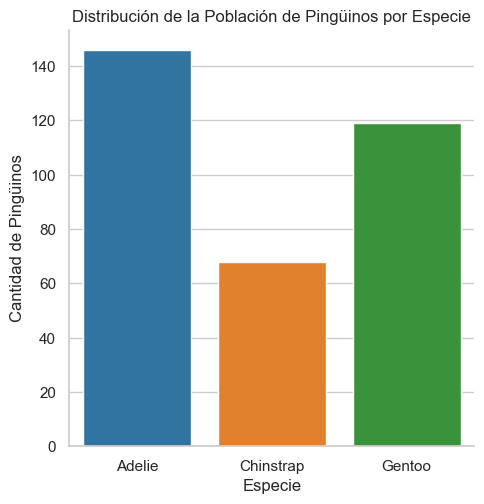

In [25]:
# Conteo de población de pingüinos por especie
# Usamos un gráfico de barras para visualizar el número de pingüinos en cada especie, lo cual ayuda a entender la distribución de especies
sns.catplot(
    data=penguins_df,
    x="species",
    hue="species", 
    kind="count",
    legend=False 
)

# Personalización de la gráfica
plt.title("Distribución de la Población de Pingüinos por Especie")
plt.xlabel("Especie")
plt.ylabel("Cantidad de Pingüinos")
plt.show()


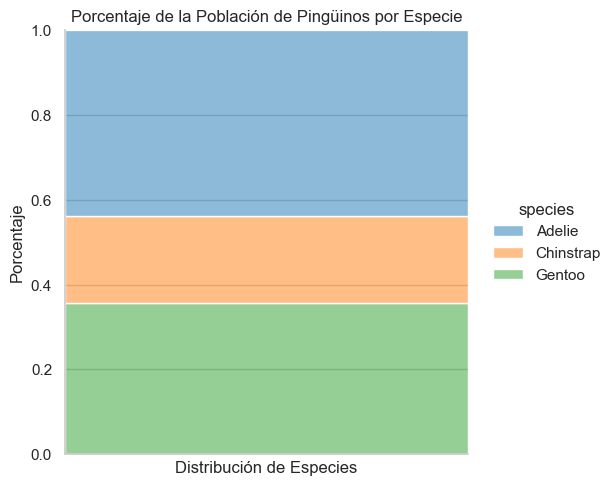

In [26]:
# Porcentaje de población por especie
# Visualizamos el porcentaje de pingüinos de cada especie en el total de la población, usando 'multiple="fill"' para normalizar la distribución.
(
    penguins_df
    .assign(penguin_population='')  # Columna temporal para representar la población
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='penguin_population',
                hue='species',
                multiple='fill',
                stat='percent',
                alpha=0.5
            )
        )
    )
)

# Personalización del gráfico
plt.title("Porcentaje de la Población de Pingüinos por Especie")
plt.xlabel("Distribución de Especies")
plt.ylabel("Porcentaje")
plt.xticks([])  # Ocultar etiquetas del eje x ya que no representan una variable específica
plt.show()

#### Distribución y Porcentaje de la Población de Pingüinos por Especie

Los gráficos muestran tanto la distribución absoluta como el porcentaje relativo de cada especie en el conjunto de datos:

- **Adelie**:
  - Es la especie más abundante, con aproximadamente **146 individuos**.
  - Representa alrededor del **44%** de la población total de pingüinos en el dataset.
  
- **Gentoo**:
  - Es la segunda especie más numerosa, con alrededor de **120 individuos**.
  - Constituye aproximadamente el **36%** de la población total.

- **Chinstrap**:
  - Es la menos representada en el dataset, con cerca de **68 individuos**.
  - Representa el **20%** de la población.

**Conclusión**: Existe un desbalance en la representación de las especies, con una mayor proporción de pingüinos Adelie y Gentoo en comparación con Chinstrap. Este desbalance podría influir en el análisis, especialmente si ciertas características están relacionadas con la especie de los pingüinos. Sin embargo, cada especie ocupa una proporción suficiente del total, permitiendo realizar comparaciones entre ellas.


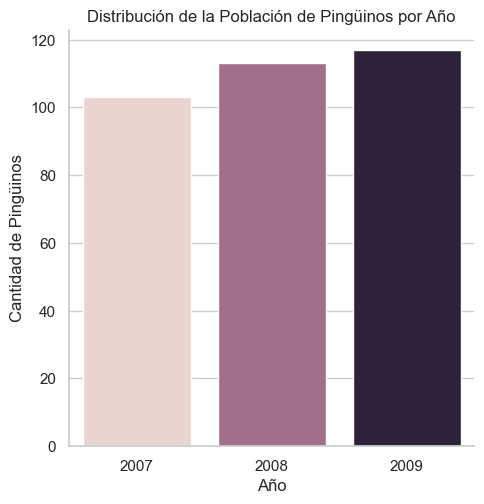

In [27]:
# Conteo de población de pingüinos por año
# Usamos un gráfico de barras para visualizar el número de pingüinos registrados en cada año, lo que permite analizar tendencias anuales
sns.catplot(
    data=penguins_df,
    x="year",
    hue="year", 
    kind="count",
    legend=False
)

# Personalización de la gráfica
plt.title("Distribución de la Población de Pingüinos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Pingüinos")
plt.show()

#### Distribución de la Población de Pingüinos por Año

El gráfico muestra la cantidad de pingüinos observados en cada año:

- **2007**: Se registraron aproximadamente **108 pingüinos**.
- **2008**: La cantidad aumentó ligeramente, con un registro de **115 pingüinos**.
- **2009**: Se observa la mayor cantidad, con **120 pingüinos** registrados.

**Conclusión**: La distribución de la población de pingüinos por año es bastante equilibrada, con una ligera tendencia al alza

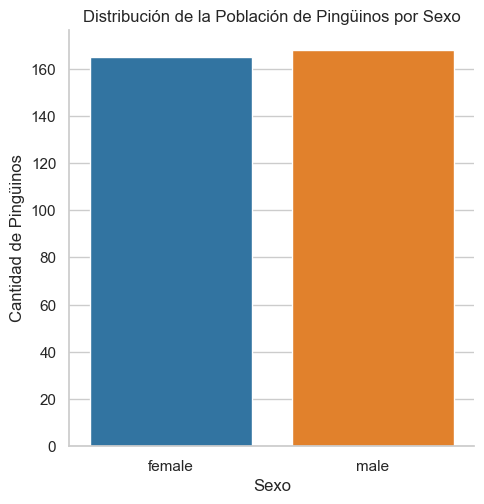

In [28]:
# Conteo de población de pingüinos por sexo
# Usamos un gráfico de barras para visualizar la cantidad de pingüinos según el sexo, permitiendo ver la distribución de machos y hembras.
sns.catplot(
    data=penguins_df,
    x="sex",
    hue="sex", 
    kind="count",
    legend=False
)

# Personalización de la gráfica
plt.title("Distribución de la Población de Pingüinos por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de Pingüinos")
plt.show()

#### Distribución de la Población de Pingüinos por Sexo

El gráfico muestra la distribución de los pingüinos en el dataset según su sexo:

- **Female (Hembra)**: Representa aproximadamente **165 individuos**.
- **Male (Macho)**: También cuenta con **168 individuos**.

**Conclusión**: La distribución de pingüinos por sexo es prácticamente equilibrada, con una diferencia mínima entre hembras y machos. Este equilibrio permite realizar comparaciones de género sin riesgo de sesgo significativo en la cantidad de datos de cada grupo.


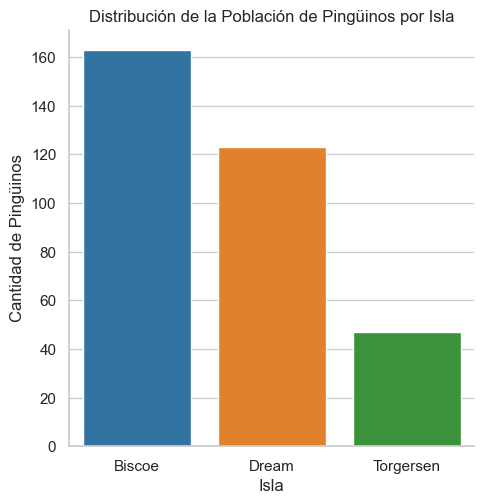

In [29]:
# Conteo de población de pingüinos por isla
# Usamos un gráfico de barras para mostrar el número de pingüinos registrados en cada isla, permitiendo comparar la distribución entre islas.
sns.catplot(
    data=penguins_df,
    x="island",
    hue="island", 
    kind="count",
    legend=False
)

# Personalización de la gráfica
plt.title("Distribución de la Población de Pingüinos por Isla")
plt.xlabel("Isla")
plt.ylabel("Cantidad de Pingüinos")
plt.show()

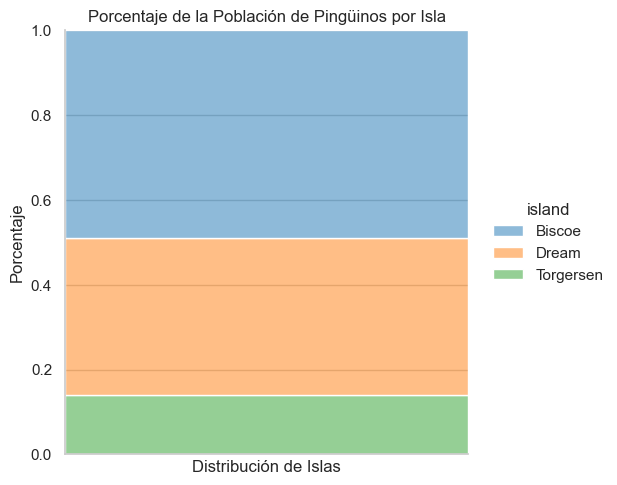

In [30]:
# Porcentaje de población de pingüinos por isla
# Visualizamos el porcentaje de pingüinos en cada isla respecto al total de la población usando `multiple="fill"` para normalizar
(
    penguins_df
    .assign(penguin_population='')  # Columna temporal para representar la población de pingüinos
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='penguin_population',
                hue='island',
                multiple='fill',
                stat='percent',
                alpha=0.5
            )
        )
    )
)

# Personalización de la gráfica
plt.title("Porcentaje de la Población de Pingüinos por Isla")
plt.xlabel("Distribución de Islas")
plt.ylabel("Porcentaje")
plt.xticks([]) 
plt.show()

#### Distribución y Porcentaje de la Población de Pingüinos por Isla

Los gráficos muestran tanto la distribución absoluta como el porcentaje relativo de la población de pingüinos en el dataset según la isla de procedencia:

- **Biscoe**:
  - Es la isla con mayor cantidad de pingüinos, con aproximadamente **163 individuos**.
  - Representa alrededor del **49%** de la población total.

- **Dream**:
  - La segunda isla con más pingüinos, con alrededor de **123 individuos**.
  - Constituye aproximadamente el **37%** de la población total.

- **Torgersen**:
  - Es la isla con menor cantidad de pingüinos, con cerca de **57 individuos**.
  - Representa el **14%** de la población.

**Conclusión**: Existe un desbalance en la distribución de pingüinos por isla, con una clara predominancia de la isla Biscoe. Este desbalance podría influir en el análisis, especialmente si ciertas características de los pingüinos están asociadas a su isla de origen. Sin embargo, cada isla cuenta con una proporción suficiente de datos para realizar comparaciones significativas.

### Conclusión

Se observa un **desbalance en la distribución de la población de pingüinos según la especie y la isla de procedencia**, lo cual podría influir en los análisis posteriores. Sin embargo, las variables de **sexo** y **distribución poblacional por año** presentan una distribución equilibrada, lo que sugiere que estas variables están uniformemente representadas en el dataset.

En las siguientes secciones, se llevará a cabo un análisis más detallado de las variables numéricas, con un enfoque específico en atributos clave de los pingüinos, como el tamaño de las aletas y el peso corporal, que podrían proporcionar información valiosa sobre las diferencias entre las especies.

___
### Medidas de Dispersión

En esta sección se analizarán las medidas de dispersión de las variables numéricas, como la varianza y la desviación estándar.
 
Las medidas de dispersión son fundamentales para entender la variabilidad de los datos y determinar cómo se distribuyen los valores en torno a la media.

- **Varianza**: Indica la dispersión de los datos respecto a la media. Una varianza alta sugiere una mayor variabilidad en los valores.
- **Desviación estándar**: Raíz cuadrada de la varianza, proporciona una medida de dispersión en las mismas unidades que la variable. Facilita la interpretación de la variabilidad en relación con la media.
- **Importancia**: Evaluar la dispersión es esencial para detectar patrones, identificar valores atípicos y entender el grado de heterogeneidad en los datos.

In [31]:
# Cálculo del rango o intervalo de valores para cada variable numérica
# Obtenemos los valores máximos y mínimos de las variables numéricas para calcular la dispersión
max_values = penguins_df.max(numeric_only=True)
min_values = penguins_df.min(numeric_only=True)

# Creamos un diccionario con los valores máximos, mínimos y el rango (diferencia entre máximo y mínimo)
data_range = {
    "max": max_values,
    "min": min_values,
    "range": np.subtract(max_values, min_values)  # Cálculo del rango
}

# Mostrar el rango como un DataFrame para una visualización clara
pd.DataFrame(data=data_range)

,max,min,range
bill_length_mm,59.6,32.1,27.5
bill_depth_mm,21.5,13.1,8.4
flipper_length_mm,231.0,172.0,59.0
body_mass_g,6300.0,2700.0,3600.0
year,2009.0,2007.0,2.0


In [32]:
# Cálculo del rango de valores dentro de una desviación estándar alrededor de la media
# Calculamos la media menos la desviación estándar y la media más la desviación estándar
data_range_std = {
    "mean_minus_std": penguins_df.mean(numeric_only=True) - penguins_df.std(numeric_only=True),
    "mean": penguins_df.mean(numeric_only=True),
    "mean_plus_std": penguins_df.mean(numeric_only=True) + penguins_df.std(numeric_only=True),
}

# Mostrar el rango dentro de ± 1 desviación estándar en un DataFrame
pd.DataFrame(data=data_range_std)

,mean_minus_std,mean,mean_plus_std
bill_length_mm,38.524124,43.992793,49.461461
bill_depth_mm,15.195629,17.164865,19.134100
flipper_length_mm,186.951202,200.966967,214.982732
body_mass_g,3401.841255,4207.057057,5012.272859
year,2007.229098,2008.042042,2008.854986


#### Análisis de Rango y Dispersión de las Variables Numéricas

##### Rango de Valores
- **bill_length_mm**: Rango de 27.5 mm (32.1 mm a 59.6 mm), con variabilidad moderada.
- **bill_depth_mm**: Rango de 8.4 mm (13.1 mm a 21.5 mm), menor variabilidad.
- **flipper_length_mm**: Rango de 59.0 mm (172.0 mm a 231.0 mm), amplia dispersión.
- **body_mass_g**: Rango de 3600 g (2700 g a 6300 g), mayor dispersión.
- **year**: Abarca 3 años (2007 a 2009), permitiendo análisis temporal.

##### Dispersión (Media ± Desviación Estándar)
- **bill_length_mm**: Media de 43.99 mm (38.52 mm a 49.46 mm), variabilidad moderada.
- **bill_depth_mm**: Media de 17.16 mm (15.20 mm a 19.13 mm), baja dispersión.
- **flipper_length_mm**: Media de 200.97 mm (186.95 mm a 214.98 mm), dispersión moderada.
- **body_mass_g**: Media de 4207.06 g (3401.84 g a 5012.27 g), alta variabilidad.
- **year**: Media de 2008.04, consistente en el tiempo.

**Conclusión**: Las variables `body_mass_g` y `flipper_length_mm` muestran la mayor variabilidad, reflejando diversidad en el tamaño de los pingüinos, mientras que `bill_depth_mm` es la menos variable.


#### Distribución de las Variables Numéricas

En esta sección se explora la distribución de cada variable numérica del dataset. Analizar la distribución permite entender cómo se concentran los datos, identificar posibles asimetrías y detectar valores atípicos.

- **Objetivo**: Visualizar la forma de la distribución de cada variable, observando si los datos se agrupan alrededor de la media o si presentan sesgos hacia algún extremo.
- **Métodos comunes**: Se emplearán histogramas y gráficos de densidad para analizar la concentración de datos, mientras que los gráficos de caja (boxplots) permitirán detectar valores atípicos.
- **Importancia**: Este análisis ayuda a entender la naturaleza de los datos y proporciona información fundamental para aplicar métodos estadísticos o de machine learning, ya que muchas técnicas asumen distribuciones específicas.

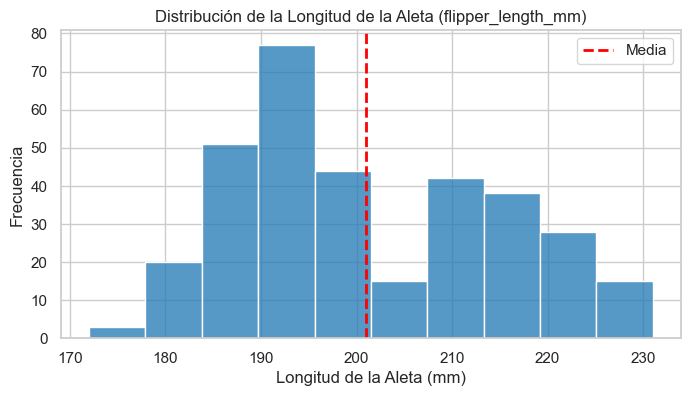

In [33]:
# Distribución de la longitud de la aleta (flipper_length_mm) con línea de la media
# Usamos un histograma para visualizar la concentración de valores de la longitud de la aleta, 
# con una línea punteada que indica el valor medio.

plt.figure(figsize=(8, 4))
sns.histplot(
    data=penguins_df,
    x='flipper_length_mm',
    legend=True
)

# Línea de la media en color rojo punteado
plt.axvline(
    x=penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="Media"
)

# Personalización de la gráfica
plt.title("Distribución de la Longitud de la Aleta (flipper_length_mm)")
plt.xlabel("Longitud de la Aleta (mm)")
plt.ylabel("Frecuencia")
plt.legend()  # Muestra la leyenda para la línea de la media
plt.show()

#### Distribución de la Longitud de la Aleta (flipper_length_mm)

El histograma muestra la distribución de la longitud de la aleta en los pingüinos:

- La **media** (línea roja punteada) se encuentra alrededor de **200 mm**, indicando la longitud promedio de la aleta.
- La mayoría de los valores se concentran entre **185 mm y 210 mm**, lo que refleja una distribución relativamente simétrica alrededor de la media.
- Existen algunos valores en los extremos, con pocas observaciones por debajo de 180 mm y por encima de 220 mm.

**Conclusión**: La longitud de la aleta presenta una distribución centrada en torno a los 200 mm, con ligera dispersión en ambos lados, lo que sugiere homogeneidad en esta característica entre los pingüinos del dataset.

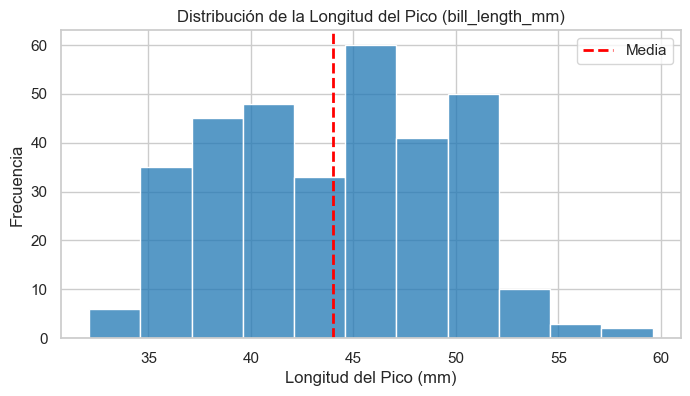

In [34]:
# Distribución de la longitud del pico (bill_length_mm) con línea de la media
# Usamos un histograma para visualizar la concentración de valores de la longitud del pico,
# junto con una línea punteada que indica el valor medio.

plt.figure(figsize=(8, 4))
sns.histplot(
    data=penguins_df,
    x='bill_length_mm',
    legend=True
)

# Línea de la media en color rojo punteado
plt.axvline(
    x=penguins_df.bill_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="Media"
)

# Personalización de la gráfica
plt.title("Distribución de la Longitud del Pico (bill_length_mm)")
plt.xlabel("Longitud del Pico (mm)")
plt.ylabel("Frecuencia")
plt.legend()  # Muestra la leyenda para la línea de la media
plt.show()

#### Distribución de la Longitud del Pico (bill_length_mm)

El histograma muestra la distribución de la longitud del pico en los pingüinos:

- La **media** (línea roja punteada) está en torno a **44 mm**, indicando la longitud promedio del pico.
- La mayor parte de los valores se concentra entre **40 mm y 50 mm**, sugiriendo una distribución centrada alrededor de la media.
- Existen algunos valores en los extremos, con menos observaciones por debajo de 35 mm y por encima de 55 mm.

**Conclusión**: La longitud del pico presenta una distribución relativamente equilibrada alrededor de la media de 44 mm, con ligera dispersión hacia los extremos, reflejando cierta uniformidad en esta característica entre los pingüinos del dataset.


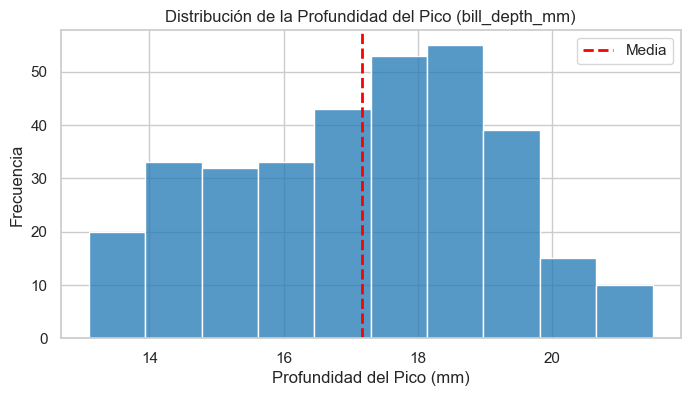

In [35]:
# Distribución de la profundidad del pico (bill_depth_mm) con línea de la media
# Utilizamos un histograma para observar la concentración de valores de la profundidad del pico,
# junto con una línea punteada que indica el valor medio.

plt.figure(figsize=(8, 4))
sns.histplot(
    data=penguins_df,
    x='bill_depth_mm',
    legend=True
)

# Línea de la media en color rojo punteado
plt.axvline(
    x=penguins_df.bill_depth_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="Media"
)

# Personalización de la gráfica
plt.title("Distribución de la Profundidad del Pico (bill_depth_mm)")
plt.xlabel("Profundidad del Pico (mm)")
plt.ylabel("Frecuencia")
plt.legend()  # Muestra la leyenda para la línea de la media
plt.show()

#### Distribución de la Profundidad del Pico (bill_depth_mm)

El histograma muestra la distribución de la profundidad del pico en los pingüinos:

- La **media** (línea roja punteada) se encuentra alrededor de **17 mm**, representando la profundidad promedio del pico.
- La mayoría de los valores se concentran entre **15 mm y 19 mm**, indicando una distribución centrada alrededor de la media.
- Existen algunos valores extremos por debajo de 14 mm y por encima de 20 mm, aunque son menos frecuentes.

**Conclusión**: La profundidad del pico tiene una distribución equilibrada con una dispersión moderada alrededor de la media de 17 mm, lo que sugiere homogeneidad en esta característica entre los pingüinos del dataset.


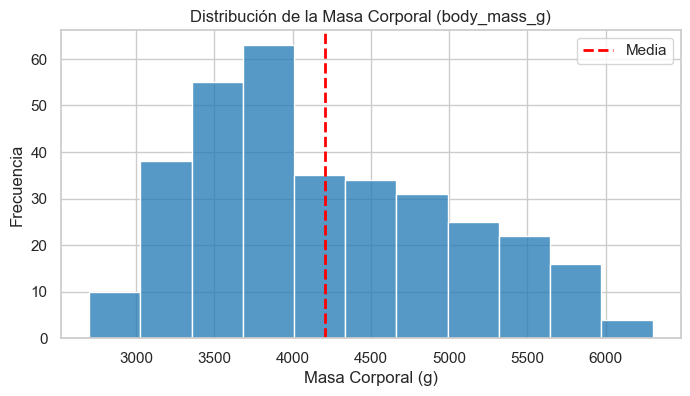

In [36]:
# Distribución de la masa corporal (body_mass_g) con línea de la media
# Usamos un histograma para observar la concentración de valores de la masa corporal,
# junto con una línea punteada que indica el valor medio.

plt.figure(figsize=(8, 4))
sns.histplot(
    data=penguins_df,
    x='body_mass_g',
    legend=True
)

# Línea de la media en color rojo punteado
plt.axvline(
    x=penguins_df.body_mass_g.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label="Media"
)

# Personalización de la gráfica
plt.title("Distribución de la Masa Corporal (body_mass_g)")
plt.xlabel("Masa Corporal (g)")
plt.ylabel("Frecuencia")
plt.legend()  # Muestra la leyenda para la línea de la media
plt.show()

#### Distribución de la Masa Corporal (body_mass_g)

El histograma muestra la distribución de la masa corporal en los pingüinos:

- La **media** (línea roja punteada) se encuentra en torno a **4200 g**, indicando la masa corporal promedio.
- La mayoría de los valores se concentran entre **3500 g y 4500 g**, con una ligera asimetría hacia valores mayores.
- Existen algunos valores más altos que alcanzan hasta **6000 g**, pero son menos frecuentes.

**Conclusión**: La masa corporal de los pingüinos presenta una ligera asimetría hacia valores altos, con una concentración en torno a los 4200 g. Esta distribución sugiere variabilidad en el tamaño de los individuos del dataset.


### Conclusión General de las Distribuciones de las Variables

El análisis de las distribuciones de las variables numéricas (longitud de la aleta, longitud del pico, profundidad del pico y masa corporal) en el dataset de pingüinos muestra los siguientes patrones:

1. **Longitud de la Aleta**: La mayoría de los pingüinos tienen una longitud de aleta cercana a los 200 mm, con una distribución simétrica y una dispersión moderada, lo que sugiere homogeneidad en esta característica.

2. **Longitud del Pico**: La longitud del pico se centra alrededor de 44 mm y presenta una distribución equilibrada, lo que indica consistencia en esta medida entre los individuos.

3. **Profundidad del Pico**: La profundidad del pico tiene una media de 17 mm y muestra menor variabilidad en comparación con otras variables, lo que sugiere que es una característica menos variable en la población de pingüinos.

4. **Masa Corporal**: La masa corporal es la variable más dispersa y muestra una ligera asimetría hacia valores altos, con una media alrededor de 4200 g. Esto indica diversidad en el tamaño de los individuos, posiblemente relacionada con diferencias de especie o edad.

**Conclusión Final**: Las características físicas de los pingüinos, como la longitud de la aleta y del pico, presentan distribuciones relativamente simétricas y centradas alrededor de la media, indicando una homogeneidad general en estas medidas. La masa corporal, sin embargo, muestra una mayor variabilidad, lo que sugiere diferencias de tamaño más pronunciadas entre los individuos. Estas observaciones podrían ser útiles para distinguir especies o analizar patrones ecológicos en la población de pingüinos.


___
## Análisis Bivariado

En esta sección se exploran las relaciones entre pares de variables en el dataset, lo cual permite identificar patrones y posibles correlaciones entre ellas.

- **Objetivo**: Analizar cómo se relacionan dos variables entre sí y detectar asociaciones o tendencias que podrían ser relevantes para el estudio de los pingüinos.
- **Métodos comunes**: Para el análisis bivariado se utilizan gráficos de dispersión (scatter plots) para variables numéricas y diagramas de caja (boxplots) cuando se comparan variables categóricas con numéricas.
- **Importancia**: Este análisis permite observar interacciones que pueden influir en el comportamiento de las variables, proporcionando una base para análisis más complejos o modelados estadísticos.


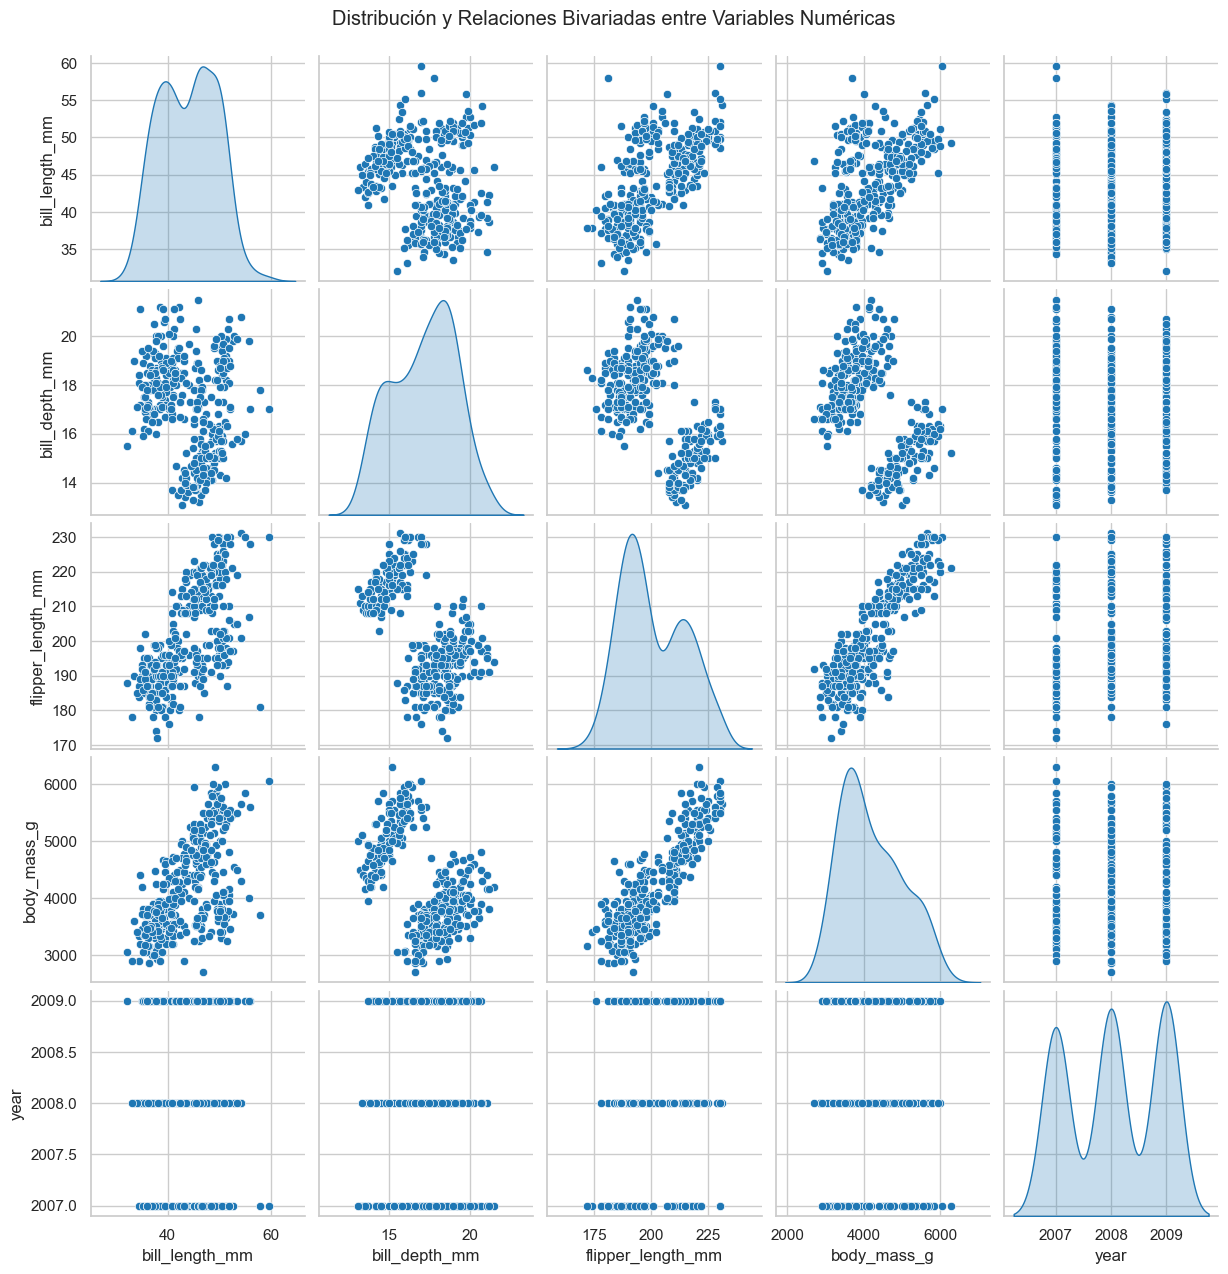

In [37]:
# Distribución y relaciones entre variables numéricas
# Utilizamos un gráfico de pares (pairplot) para observar las relaciones entre todas las variables numéricas.
# La diagonal muestra la distribución de cada variable individualmente, y los gráficos de dispersión muestran las relaciones bivariadas.

sns.pairplot(
    penguins_df, 
    diag_kind='kde',
)

# Personalización adicional del gráfico
plt.suptitle("Distribución y Relaciones Bivariadas entre Variables Numéricas", y=1.02)
plt.show()

#### Distribución de Variables Numéricas

El gráfico de pares muestra tanto la distribución univariada como las relaciones bivariadas entre las variables numéricas en el dataset de pingüinos:

- **Distribución Univariada**: Los histogramas de cada variable en la diagonal indican la dispersión y concentración de valores. Destaca la **distribución bimodal** en `bill_length_mm` y `flipper_length_mm`, lo cual sugiere la posible influencia de distintos grupos (especies) en el dataset.

- **Relaciones Bivariadas**:
  - **bill_length_mm y flipper_length_mm**: Existe una correlación positiva fuerte, lo que sugiere que los pingüinos con picos más largos tienden a tener aletas más largas.
  - **body_mass_g con flipper_length_mm y bill_length_mm**: También muestran una correlación positiva, indicando que pingüinos más pesados tienden a tener tanto aletas como picos más largos.
  - **bill_depth_mm**: No muestra una correlación clara con las otras variables, lo cual sugiere que su variabilidad es independiente de la longitud de la aleta y del pico.

**Conclusión**: Este análisis revela que algunas características físicas de los pingüinos, como la longitud de la aleta y la longitud del pico, están fuertemente correlacionadas entre sí y con la masa corporal. La profundidad del pico, sin embargo, parece ser una variable independiente. Estas relaciones pueden ser útiles para distinguir grupos o especies dentro del dataset.


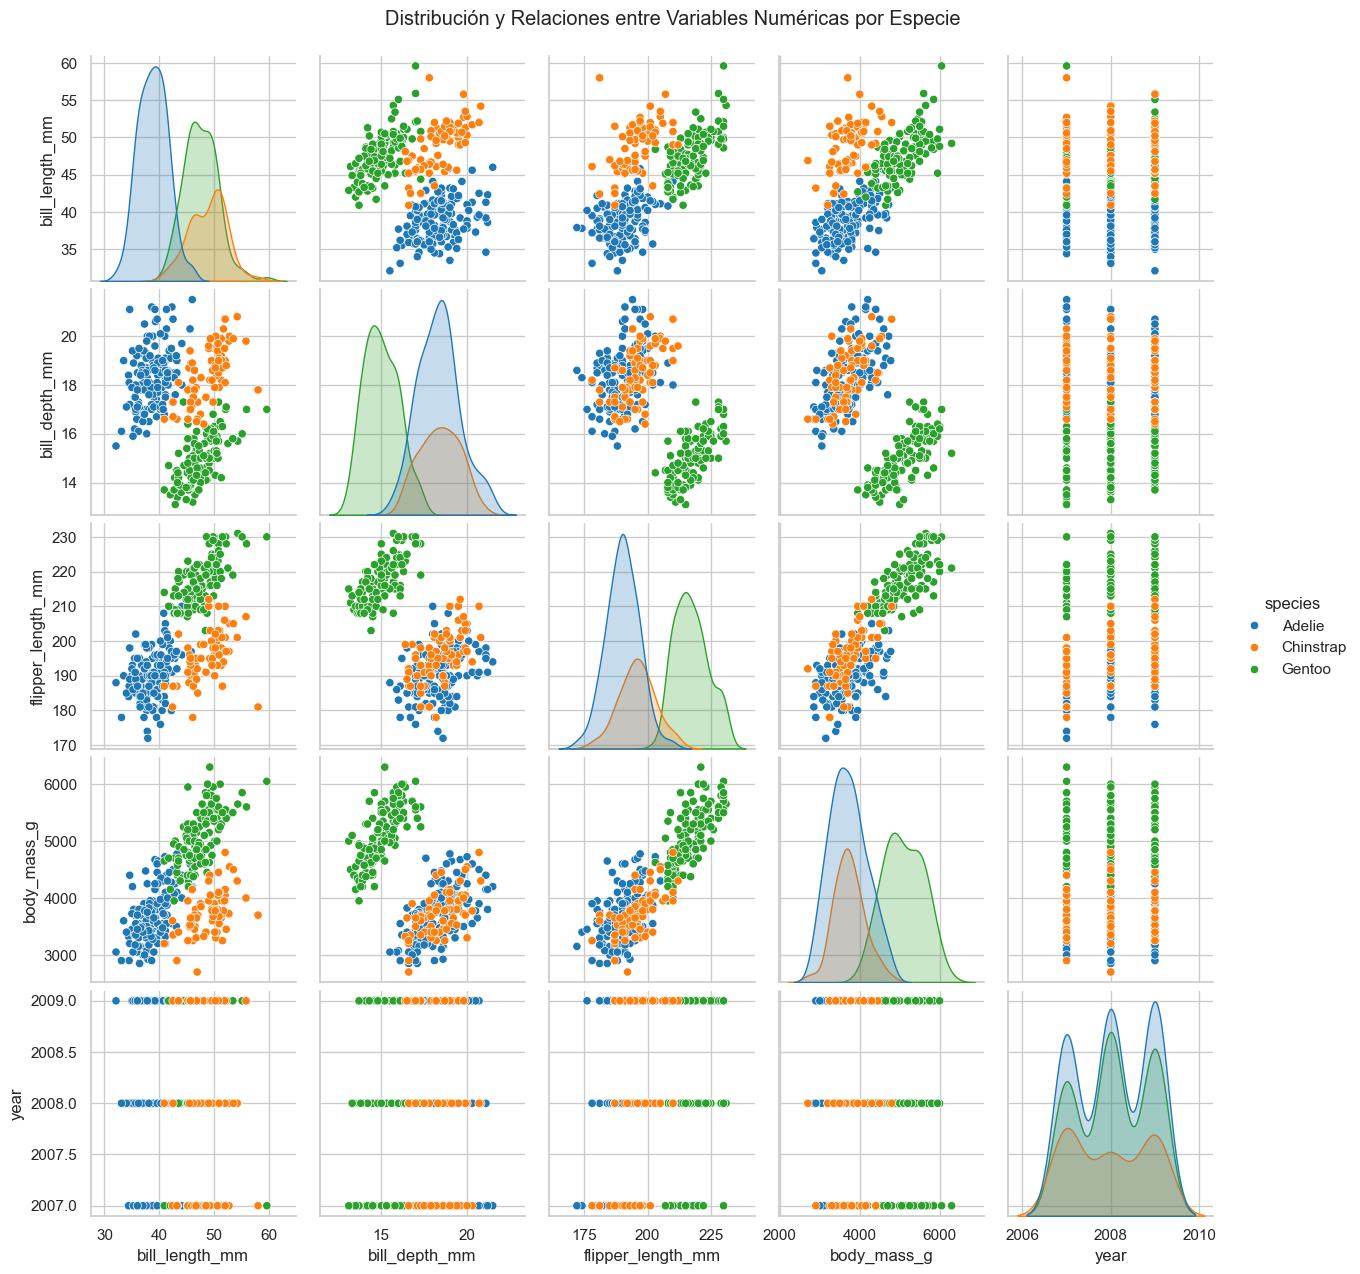

In [38]:
# Distribución y relación entre variables numéricas por especie
# Usamos un gráfico de pares (pairplot) para observar las relaciones entre variables numéricas,
# diferenciando cada especie de pingüino. Esto permite ver patrones específicos por especie.

sns.pairplot(
    penguins_df,
    hue='species',
    diag_kind='kde',
)

# Personalización adicional del gráfico
plt.suptitle("Distribución y Relaciones entre Variables Numéricas por Especie", y=1.02)
plt.show()

#### Distribución de Variables Numéricas por Especie

Este gráfico de pares, coloreado por especie, muestra la distribución univariada y las relaciones bivariadas de las variables numéricas en el dataset de pingüinos:

- **Distribución por Especie**:
  - Las especies presentan distribuciones distintas en varias variables, lo que facilita su diferenciación.
  - **Adelie**: Se concentra en rangos más bajos de `bill_length_mm` y `body_mass_g`.
  - **Gentoo**: Tiende a tener valores altos en `flipper_length_mm` y `body_mass_g`, distinguiéndose claramente de las otras especies.
  - **Chinstrap**: Muestra valores intermedios para `bill_length_mm` y `body_mass_g`, pero comparte algunas características con Adelie en `bill_depth_mm`.

- **Relaciones Bivariadas por Especie**:
  - Las correlaciones positivas entre `flipper_length_mm` y `body_mass_g` son evidentes en todas las especies, aunque los valores absolutos difieren.
  - **bill_length_mm** y **flipper_length_mm** también están positivamente correlacionadas, especialmente en Gentoo, lo que refuerza la relación entre estas dimensiones físicas.
  - **bill_depth_mm** es relativamente constante en Adelie, mientras que en Gentoo y Chinstrap muestra más variación en relación con otras variables.

**Conclusión**: Cada especie presenta patrones únicos en sus características físicas, lo que facilita su diferenciación. Las relaciones entre longitud de aleta, longitud del pico y masa corporal son consistentes en todas las especies, pero los valores específicos ayudan a distinguirlas. Este análisis sugiere que las especies pueden identificarse eficazmente en función de estas variables.


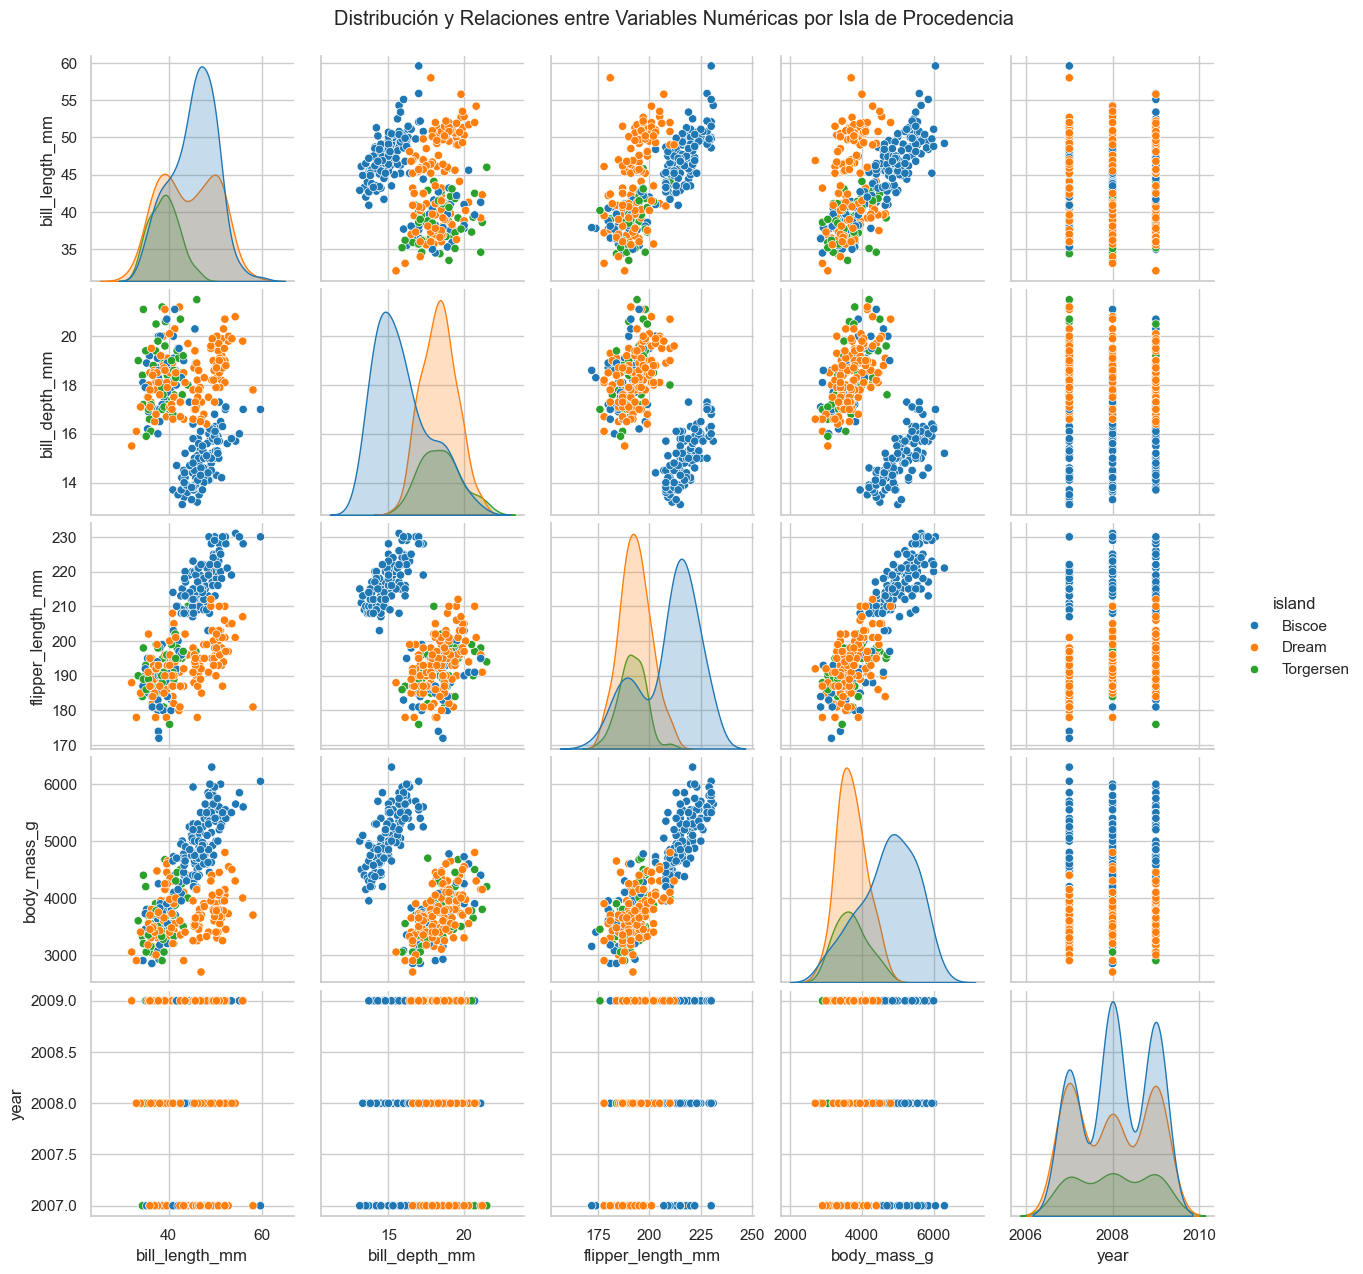

In [39]:
# Distribución y relación entre variables numéricas por isla de procedencia
# Utilizamos un gráfico de pares (pairplot) para observar las relaciones entre variables numéricas,
# diferenciando por isla de procedencia. Esto ayuda a detectar patrones específicos entre las islas.

sns.pairplot(
    penguins_df, 
    hue='island',
    diag_kind='kde',
)

# Personalización adicional del gráfico
plt.suptitle("Distribución y Relaciones entre Variables Numéricas por Isla de Procedencia", y=1.02)
plt.show()


#### Distribución de Variables Numéricas por Isla de Procedencia

Este gráfico de pares, coloreado por isla, muestra la distribución univariada y las relaciones bivariadas de las variables numéricas en el dataset de pingüinos según su isla de procedencia.

- **Distribución por Isla**:
  - **Biscoe**: Los pingüinos de esta isla presentan una mayor variabilidad en `body_mass_g` y `flipper_length_mm`, lo que indica diversidad en tamaño y masa corporal.
  - **Dream**: Los individuos de esta isla tienden a concentrarse en valores intermedios para `bill_length_mm` y `flipper_length_mm`.
  - **Torgersen**: Tiene menor variabilidad en `bill_length_mm` y `bill_depth_mm`, con valores más concentrados y bajos en comparación con las otras islas.

- **Relaciones Bivariadas por Isla**:
  - Existe una correlación positiva entre `flipper_length_mm` y `body_mass_g` en todas las islas, aunque los valores absolutos y la dispersión varían según la isla.
  - Los pingüinos de Biscoe tienen los valores más altos en `body_mass_g`, mientras que los de Torgersen tienden a presentar valores más bajos en la mayoría de las variables.
  - Las relaciones entre `bill_length_mm` y `bill_depth_mm` son similares entre las islas, pero con distinta dispersión, especialmente en Biscoe y Dream.

**Conclusión**: Las islas de procedencia muestran patrones distintivos en las características físicas de los pingüinos, especialmente en `body_mass_g` y `flipper_length_mm`. La isla Biscoe tiene la mayor diversidad en tamaño, mientras que Torgersen presenta valores más homogéneos y concentrados. Estos patrones podrían ser útiles para identificar diferencias ecológicas entre las poblaciones de pingüinos en distintas islas.


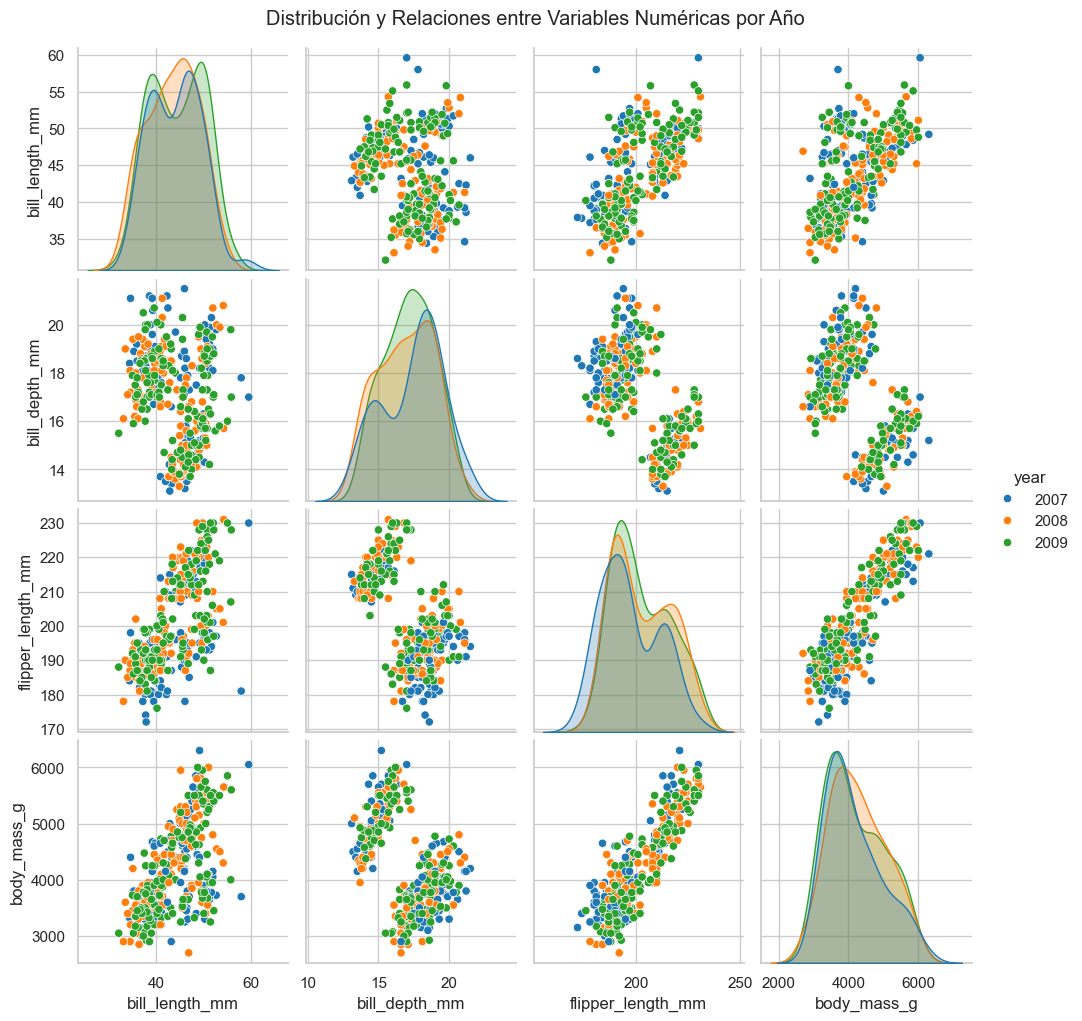

In [40]:
# Distribución y relación entre variables numéricas por año
# Utilizamos un gráfico de pares (pairplot) para observar las relaciones entre variables numéricas,
# diferenciando por año de recolección de datos. Esto permite detectar posibles cambios en las mediciones a lo largo del tiempo.

sns.pairplot(
    penguins_df, 
    hue='year',           # Diferenciar por año para analizar posibles cambios temporales
    diag_kind='kde',      # Usar densidad en la diagonal para suavizar la visualización
    palette='tab10'
)

# Personalización adicional del gráfico
plt.suptitle("Distribución y Relaciones entre Variables Numéricas por Año", y=1.02)
plt.show()


#### Distribución de Variables Numéricas por Año

Este gráfico de pares, coloreado por año, muestra la distribución univariada y las relaciones bivariadas de las variables numéricas en el dataset de pingüinos a lo largo de los años 2007, 2008 y 2009.

- **Distribución por Año**:
  - Las distribuciones de las variables numéricas son consistentes a lo largo de los años, sin cambios significativos entre 2007, 2008 y 2009.
  - Las curvas de densidad en la diagonal para cada variable muestran superposición entre los años, indicando estabilidad en las características físicas de los pingüinos a lo largo del tiempo.

- **Relaciones Bivariadas por Año**:
  - Las correlaciones entre variables, como entre `flipper_length_mm` y `body_mass_g`, se mantienen constantes en los tres años.
  - No se observan tendencias o variaciones significativas en las relaciones entre las variables a lo largo del tiempo, lo que sugiere que las características de los pingüinos no cambiaron considerablemente entre 2007 y 2009.

**Conclusión**: Las características físicas de los pingüinos y sus relaciones se mantienen estables a lo largo de los años estudiados, sin variaciones significativas en los valores de las variables numéricas. Esto indica una consistencia en la estructura de la población de pingüinos durante este periodo.


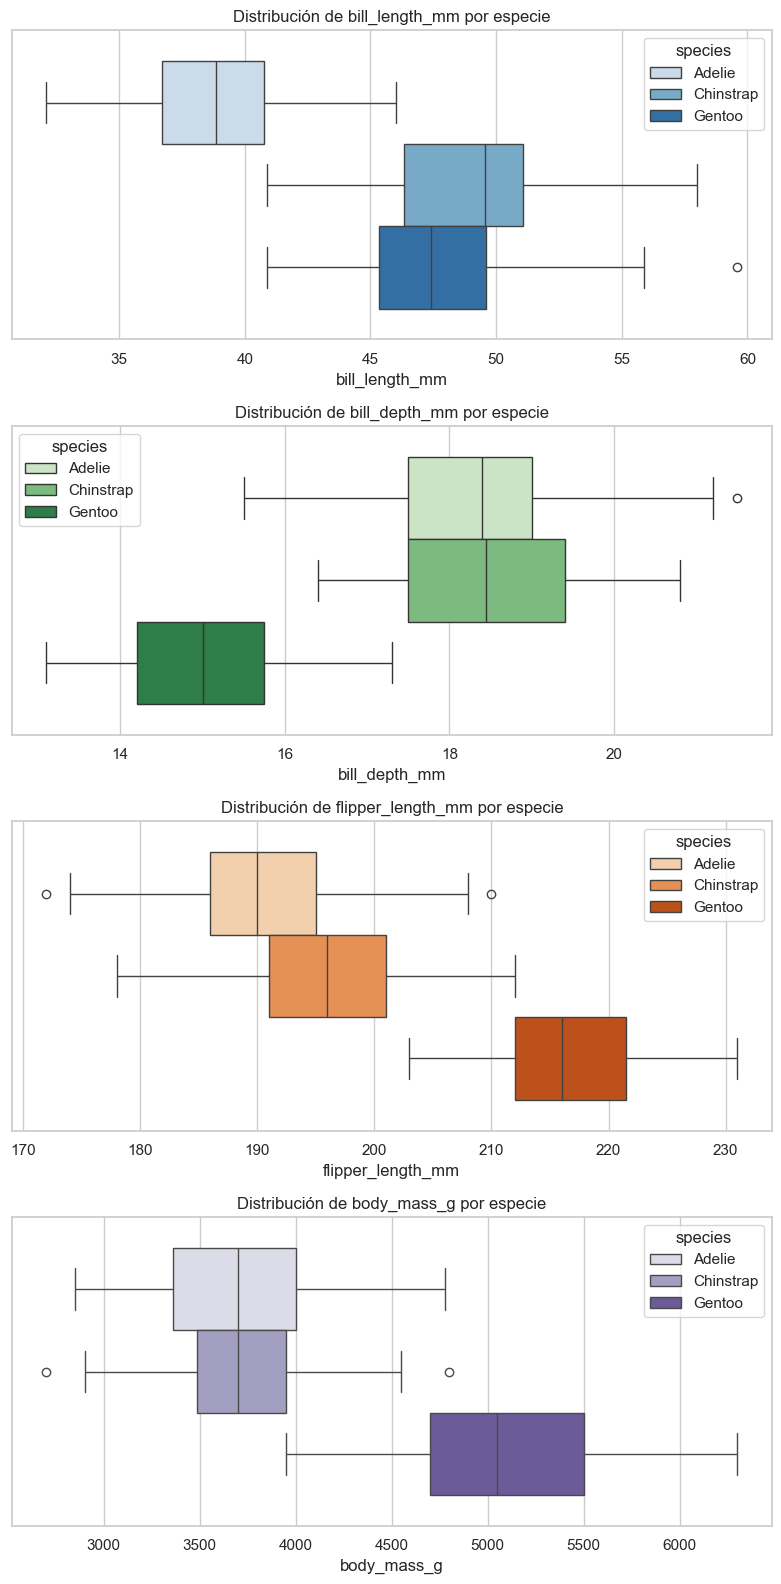

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=False)

# Columnas que queremos graficar
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Paletas de colores distintas para cada gráfico
palettes = ['Blues', 'Greens', 'Oranges', 'Purples']

# Crear un boxplot para cada columna con una paleta diferente
for i, (column, palette) in enumerate(zip(columns, palettes)):
    sns.boxplot(
        data=penguins_df,
        x=column,
        hue='species',
        ax=axes[i],
        palette=palette,
        legend=True
    )
    axes[i].set_title(f'Distribución de {column} por especie')

plt.tight_layout()
plt.show()

#### Distribución de Características Físicas por Especie con Leyenda

Estos boxplots muestran la distribución de varias características físicas de los pingüinos según su especie, con una leyenda añadida para facilitar la interpretación:

1. **bill_length_mm**:
   - **Adelie** tiene picos más cortos en comparación con **Chinstrap** y **Gentoo**.
   - **Chinstrap** presenta la mayor longitud de pico, mientras que **Gentoo** se encuentra en un rango intermedio.

2. **bill_depth_mm**:
   - **Adelie** tiene mayor profundidad de pico, seguido de **Chinstrap** y luego **Gentoo**, que presenta los valores más bajos.

3. **flipper_length_mm**:
   - **Gentoo** se distingue por tener las aletas más largas, mientras que **Adelie** y **Chinstrap** presentan longitudes más cortas y similares entre sí.

4. **body_mass_g**:
   - **Gentoo** es la especie con mayor masa corporal, mientras que **Adelie** y **Chinstrap** tienen masas corporales más bajas y similares.

**Conclusión**: Cada especie de pingüino presenta características físicas distintivas que permiten diferenciarlas, con **Gentoo** siendo la más grande en masa corporal y longitud de aletas, **Chinstrap** destacando en longitud de pico, y **Adelie** en profundidad de pico. Estas diferencias pueden ser indicativas de adaptaciones evolutivas según las necesidades de cada especie.

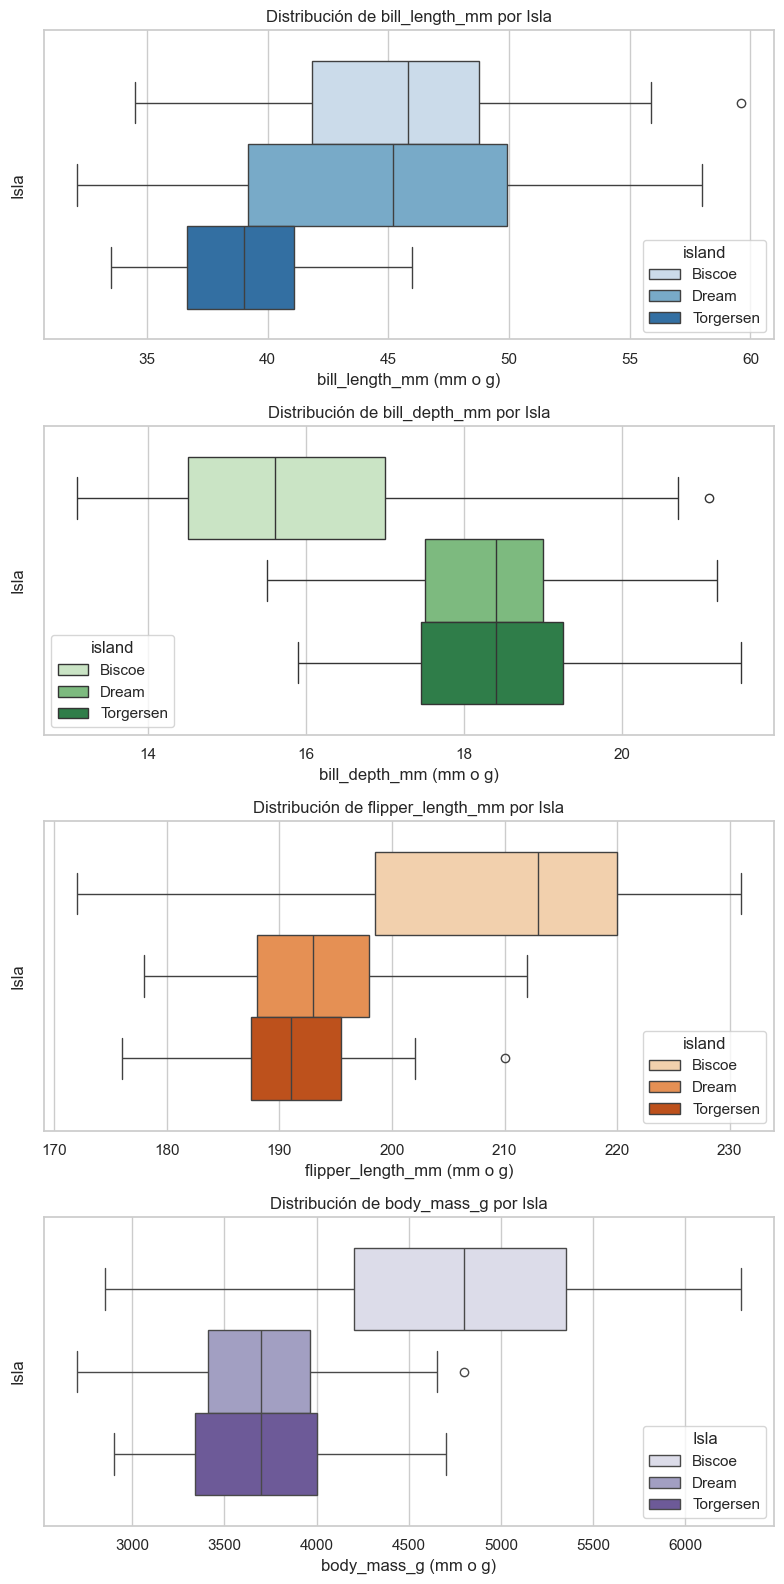

In [42]:
# Distribución de variables numéricas por Isla usando gráficos de caja
# Generamos un gráfico de caja separado para cada variable numérica, diferenciando cada Isla y usando paletas de colores únicas.

fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=False)

# Columnas numéricas que queremos graficar
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Paletas de colores distintas para cada gráfico para mejor visualización
palettes = ['Blues', 'Greens', 'Oranges', 'Purples']

# Crear un boxplot para cada columna con una paleta diferente y diferenciación por Isla
for i, (column, palette) in enumerate(zip(columns, palettes)):
    sns.boxplot(
        data=penguins_df,
        x=column,
        hue='island',
        ax=axes[i],
        palette=palette,
        legend=True
    )
    # Título y etiquetas para cada subgráfico
    axes[i].set_title(f'Distribución de {column} por Isla')
    axes[i].set_xlabel(f'{column} (mm o g)')
    axes[i].set_ylabel('Isla')

# Añadir la leyenda para las Islas en la última subgráfica
axes[-1].legend(title="Isla")

plt.tight_layout()  # Ajuste de espacio entre gráficos
plt.show()

#### Distribución de Características Físicas por Isla

Estos boxplots muestran la distribución de varias características físicas de los pingüinos según su isla de procedencia, con una leyenda para identificar cada isla:

1. **bill_length_mm**:
   - Los pingüinos de **Biscoe** presentan mayor variabilidad en la longitud del pico, con valores superiores a los de **Dream** y **Torgersen**.
   - **Torgersen** tiene los picos más cortos en comparación con las otras islas.

2. **bill_depth_mm**:
   - **Torgersen** muestra una mayor profundidad de pico en promedio, mientras que **Biscoe** y **Dream** tienen profundidades de pico similares y menores.

3. **flipper_length_mm**:
   - Los pingüinos de **Biscoe** presentan aletas más largas, mientras que los de **Torgersen** tienen las aletas más cortas.

4. **body_mass_g**:
   - **Biscoe** también tiene pingüinos con mayor masa corporal, mientras que los de **Dream** y **Torgersen** son más ligeros en promedio.

**Conclusión**: Las islas de procedencia influyen en las características físicas de los pingüinos, con los individuos de **Biscoe** siendo generalmente más grandes (mayor longitud de aleta y masa corporal), mientras que los de **Torgersen** tienen picos más profundos y cortos. Estas diferencias pueden reflejar adaptaciones a los entornos específicos de cada isla.

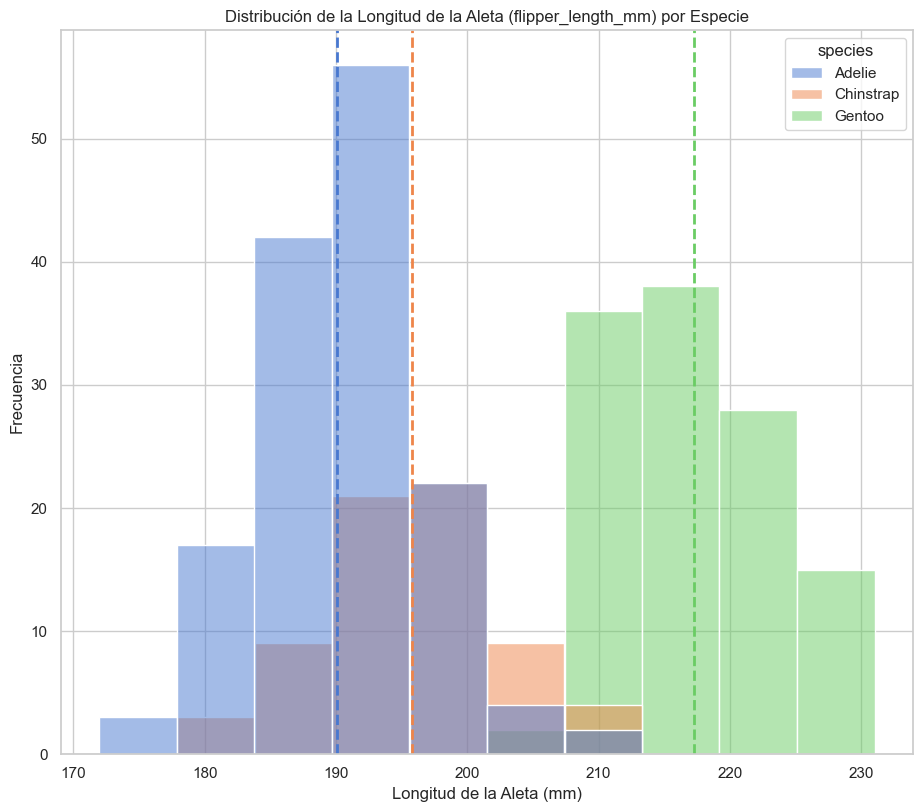

In [43]:
# Histograma para visualizar la distribución de la longitud de la aleta por especie
# Este gráfico muestra la distribución de la longitud de la aleta para cada especie, 
# con líneas punteadas que indican la media para cada grupo.

# Se obtienen los datos por especie
species = penguins_df.species.unique()
adelie_df = penguins_df.query("species == 'Adelie'")
gentoo_df = penguins_df.query("species == 'Gentoo'")
chinstrap_df = penguins_df.query("species == 'Chinstrap'")
species_data = [adelie_df, chinstrap_df, gentoo_df]

# Se grafica la distribución por especie con una paleta de colores
palette = sns.color_palette("muted", len(species))
sns.histplot(
    data=penguins_df.sort_values(by="species"),
    x='flipper_length_mm',
    hue='species',
    multiple='layer',
    palette=palette,
    legend=True
)

# Se agregan las líneas de promedios para cada especie en el histograma
for data, color in zip(species_data, palette):
    plt.axvline(
        x=data.flipper_length_mm.mean(),
        color=color,
        linestyle='dashed',
        linewidth=2,
    )

# Personalización de la gráfica
plt.title("Distribución de la Longitud de la Aleta (flipper_length_mm) por Especie")
plt.xlabel("Longitud de la Aleta (mm)")
plt.ylabel("Frecuencia")
# plt.legend(title="Especie")
plt.show()

#### Distribución de la Longitud de la Aleta (flipper_length_mm) por Especie

Este histograma muestra la distribución de la longitud de la aleta en los pingüinos según su especie, con líneas punteadas que representan la media de cada especie:

- **Adelie** (azul): La mayoría de los individuos tienen aletas entre 185 mm y 195 mm, con una media cercana a 190 mm.
- **Chinstrap** (naranja): Presenta un rango de aletas similar al de Adelie, con una media en torno a 195 mm.
- **Gentoo** (verde): Se distingue con las aletas más largas, con valores entre 210 mm y 230 mm, y una media alrededor de 220 mm.

**Conclusión**: La longitud de la aleta es una característica distintiva entre especies. Los pingüinos **Gentoo** tienen aletas significativamente más largas que **Adelie** y **Chinstrap**, lo cual puede ayudar a diferenciarlos en estudios ecológicos y de comportamiento.


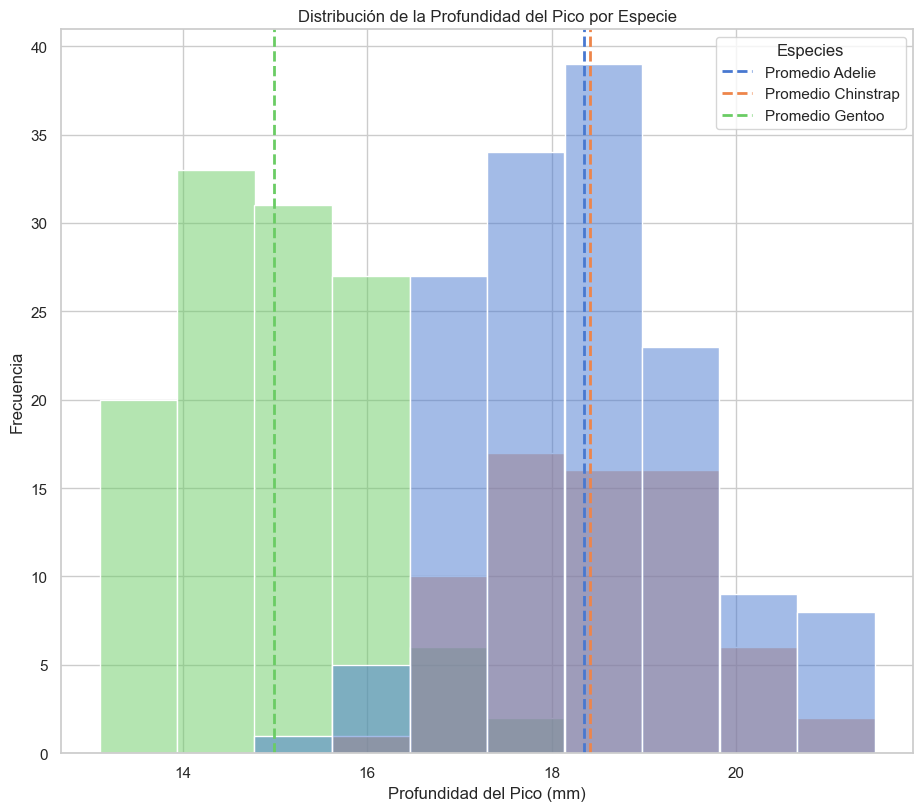

In [44]:
# Distribución de la profundidad del pico (bill_depth_mm) por especie con líneas de promedio
# Utilizamos un histograma para visualizar la distribución de la profundidad del pico, 
# con una línea punteada de promedio para cada especie, diferenciada por color.

# Definición de la paleta de colores para las especies
palette = sns.color_palette("muted", len(species))

sns.histplot(
    data=penguins_df.sort_values(by="species"),  # Ordenamos para mejor visualización por especie
    x='bill_depth_mm',
    hue='species',
    multiple='layer',
    palette=palette
)

# Añadir líneas de promedio para cada especie
for data, color in zip(species_data, palette):
    plt.axvline(
        x=data.bill_depth_mm.mean(),
        color=color,
        linestyle='dashed',
        linewidth=2,
        label=f"Promedio {data['species'].iloc[0]}" 
    )

# Personalización de la gráfica
plt.title("Distribución de la Profundidad del Pico por Especie")
plt.xlabel("Profundidad del Pico (mm)")
plt.ylabel("Frecuencia")
plt.legend(title="Especies")
plt.show()

#### Distribución de la Profundidad del Pico por Especie

Este histograma muestra la distribución de la profundidad del pico en los pingüinos según su especie, con líneas punteadas que representan la media de cada especie:

- **Adelie** (azul): La profundidad del pico se concentra alrededor de los 18 mm, con una media ligeramente superior a la de **Chinstrap** y **Gentoo**.
- **Chinstrap** (naranja): Presenta profundidades de pico similares a **Adelie**, con una media alrededor de los 18 mm.
- **Gentoo** (verde): Se distingue con picos más superficiales, con una media en torno a los 15 mm.

**Conclusión**: La profundidad del pico varía significativamente entre las especies. Los pingüinos **Gentoo** tienen picos menos profundos en comparación con **Adelie** y **Chinstrap**, lo cual puede ser un rasgo distintivo útil para la identificación de especies en estudios de campo.

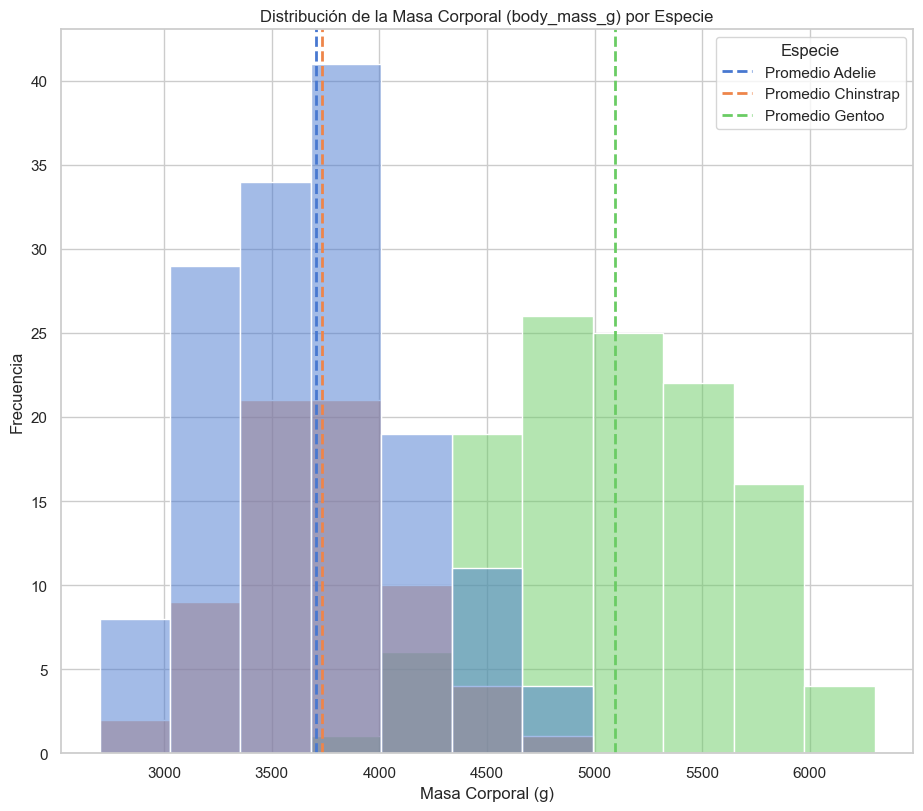

In [45]:
# Histograma para visualizar la distribución de la masa corporal (body_mass_g) por especie
# Este gráfico muestra la distribución de la masa corporal para cada especie,
# con líneas punteadas que indican el promedio específico de cada grupo.

# Se grafica la distribución por especie con una paleta de colores
palette = sns.color_palette("muted", len(species))
sns.histplot(
    data=penguins_df.sort_values(by="species"),
    x='body_mass_g',
    hue='species',
    multiple='layer',
    palette=palette
)

# Se agregan las líneas de promedio para cada especie en el histograma
for data, color in zip(species_data, palette):
    plt.axvline(
        x=data.body_mass_g.mean(),
        color=color,
        linestyle='dashed',
        linewidth=2,
        label=f"Promedio {data['species'].iloc[0]}" 
    )

# Personalización de la gráfica
plt.title("Distribución de la Masa Corporal (body_mass_g) por Especie")
plt.xlabel("Masa Corporal (g)")
plt.ylabel("Frecuencia")
plt.legend(title="Especie")
plt.show()

#### Distribución de la Masa Corporal (body_mass_g) por Especie

Este histograma muestra la distribución de la masa corporal en los pingüinos según su especie, con líneas punteadas que representan la media de cada especie:

- **Adelie** (azul): La mayoría de los individuos tienen una masa corporal cercana a los 3700 g, con una media en torno a los 3700-4000 g.
- **Chinstrap** (naranja): Presenta una masa corporal similar a **Adelie**, con una media alrededor de los 3900 g.
- **Gentoo** (verde): Se caracteriza por tener pingüinos más grandes, con una masa corporal media alrededor de los 5000 g y una distribución que alcanza hasta los 6000 g.

**Conclusión**: La masa corporal es una característica distintiva entre especies. Los pingüinos **Gentoo** tienen una masa corporal significativamente mayor en comparación con **Adelie** y **Chinstrap**, lo cual podría estar relacionado con diferencias en el hábitat o en la dieta y permite diferenciarlos fácilmente.


#### Conclusión General de las Distribuciones de Características Físicas

El análisis de las distribuciones de las características físicas de los pingüinos por especie revela patrones distintivos que pueden facilitar su identificación y comprensión de sus adaptaciones biológicas:

1. **Longitud de la Aleta (flipper_length_mm)**:
   - Los pingüinos **Gentoo** presentan aletas considerablemente más largas en comparación con **Adelie** y **Chinstrap**, lo cual podría estar relacionado con adaptaciones de movilidad o alimentación específicas.

2. **Profundidad del Pico (bill_depth_mm)**:
   - **Adelie** tiene una mayor profundidad de pico, seguida de **Chinstrap**, mientras que **Gentoo** tiene los picos más superficiales. Esto puede indicar adaptaciones alimenticias, donde el tipo de alimento influye en la forma del pico.

3. **Longitud del Pico (bill_length_mm)**:
   - **Chinstrap** tiene el pico más largo, mientras que **Adelie** y **Gentoo** presentan longitudes de pico más cortas y similares entre sí, lo cual podría estar relacionado con la dieta y el método de captura de alimento de cada especie.

4. **Masa Corporal (body_mass_g)**:
   - **Gentoo** se distingue por tener la masa corporal más alta, mientras que **Adelie** y **Chinstrap** tienen masas corporales similares y menores. Esto sugiere que **Gentoo** es la especie de mayor tamaño, lo cual podría influir en su comportamiento y en su capacidad para sobrevivir en distintos entornos.

**Conclusión Final**: Cada especie de pingüino presenta diferencias marcadas en sus características físicas, que reflejan posibles adaptaciones a su hábitat y dieta. **Gentoo** destaca por su mayor tamaño general (mayor longitud de aleta y masa corporal), mientras que **Adelie** y **Chinstrap** muestran variaciones en el tamaño y forma del pico. Estos patrones de variabilidad son útiles para la identificación de especies y ofrecen una base para estudiar sus adaptaciones ecológicas.

___
### Correlación entre Variables

En esta sección se analiza la correlación entre las variables numéricas del dataset. La correlación mide la intensidad y dirección de la relación entre dos variables, y es fundamental para entender cómo las variaciones en una variable pueden estar asociadas con cambios en otra.

- **Objetivo**: Identificar relaciones significativas entre variables numéricas, lo cual puede ser útil para análisis predictivos y modelado.
- **Interpretación de valores**:
  - Los valores cercanos a +1 indican una **fuerte correlación positiva**, es decir, ambas variables tienden a aumentar o disminuir juntas.
  - Los valores cercanos a -1 indican una **fuerte correlación negativa**, donde un aumento en una variable corresponde a una disminución en la otra.
  - Los valores cercanos a 0 sugieren **poca o ninguna correlación** entre las variables.
- **Importancia**: Este análisis permite detectar relaciones importantes en el dataset que podrían influir en el comportamiento de otras variables y facilitar la selección de variables para futuros modelos.

El mapa de calor visualiza estas relaciones y facilita la interpretación rápida de las correlaciones.


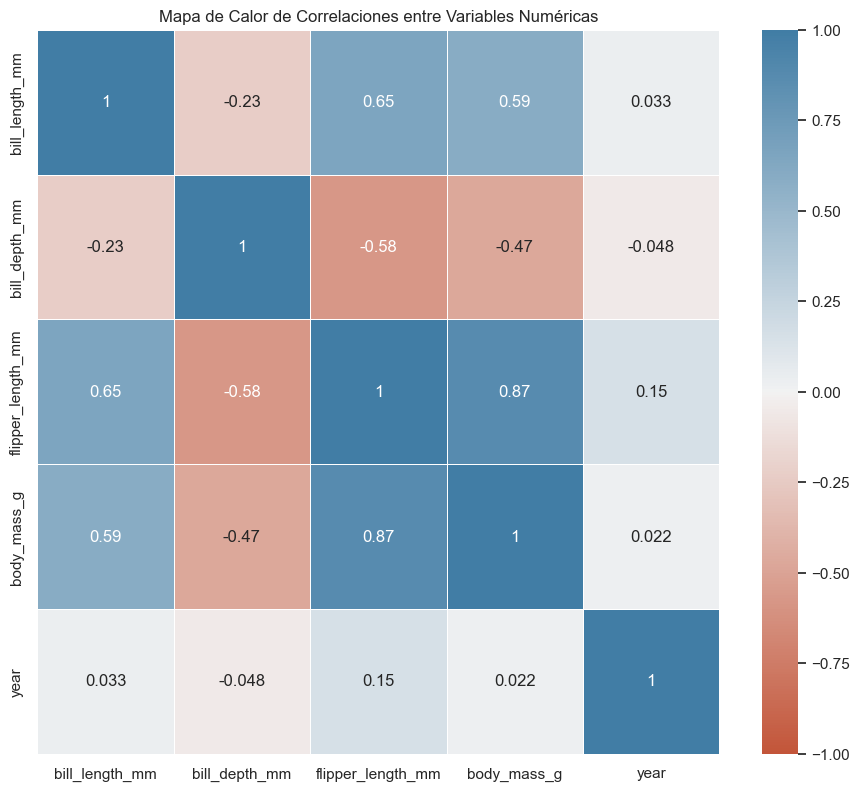

In [46]:
# Mapa de calor de la correlación entre variables numéricas
# Utilizamos un mapa de calor (heatmap) para visualizar las correlaciones entre variables numéricas en el dataset.
# Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.

sns.heatmap(
    data=penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True,  # Mostrar valores de correlación en cada celda
)

# Personalización del gráfico
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()


#### Mapa de Calor de Correlaciones entre Variables Numéricas

Este mapa de calor muestra las correlaciones entre las variables numéricas del dataset de pingüinos:

- **Correlaciones Positivas**:
  - Existe una **fuerte correlación positiva** entre `flipper_length_mm` y `body_mass_g` (0.87), indicando que los pingüinos con aletas más largas tienden a tener una mayor masa corporal.
  - `bill_length_mm` también presenta una correlación moderada con `flipper_length_mm` (0.65) y `body_mass_g` (0.59), lo cual sugiere que el tamaño del pico está relacionado con el tamaño general del pingüino.

- **Correlaciones Negativas**:
  - `bill_depth_mm` muestra una correlación negativa moderada con `flipper_length_mm` (-0.58) y `body_mass_g` (-0.47), lo que sugiere que pingüinos con picos más profundos tienden a tener aletas más cortas y menor masa corporal.

- **Correlación con el Año (`year`)**:
  - Las correlaciones entre `year` y las otras variables son bajas, lo que indica que no hay una tendencia temporal significativa en las características físicas medidas.

**Conclusión**: Las correlaciones sugieren que las características físicas de los pingüinos están interrelacionadas, especialmente entre la longitud de la aleta y la masa corporal. Las variables relacionadas con el tamaño, como `flipper_length_mm` y `body_mass_g`, están positivamente correlacionadas, lo cual es consistente con la estructura corporal de los pingüinos. La profundidad del pico, sin embargo, parece ser una característica independiente, posiblemente relacionada con factores específicos de la dieta o adaptación.


#### Transformación de Variables Categóricas

En esta sección se realiza la transformación de variables categóricas a un formato numérico, que facilita su uso en análisis estadísticos y modelos de machine learning.

- **Objetivo**: Convertir variables categóricas, como `species` o `island`, en representaciones numéricas para que puedan ser procesadas por algoritmos que requieren datos numéricos.
- **Métodos comunes**:
  - **Codificación ordinal**: Asigna un valor numérico único a cada categoría, cuando existe un orden intrínseco en las categorías.
  - **Codificación one-hot**: Crea una columna binaria por cada categoría (1 si la observación pertenece a esa categoría, 0 en caso contrario), útil para variables sin orden específico.
- **Importancia**: La transformación de variables categóricas permite a los modelos utilizar toda la información disponible en el dataset sin perder el valor informativo de las categorías.

In [47]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [48]:
# Transformación de variables categóricas en variables numéricas
# Creamos una copia del DataFrame original y asignamos valores numéricos a las variables categóricas para facilitar el análisis.

penguins_2_df = penguins_df.copy()  # Crear una copia para conservar el original
penguins_2_df = (
    penguins_2_df.assign(
        # Transformación de 'sex': 'male' -> 1, 'female' -> 0
        numeric_sex=lambda df: df.sex.map({'male': 1, 'female': 0}).astype(int),
        
        # Transformación de 'island': 'Torgersen' -> 0, 'Biscoe' -> 1, 'Dream' -> 2
        numeric_island=lambda df: df.island.map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}).astype(int),
        
        # Transformación de 'species': 'Adelie' -> 0, 'Gentoo' -> 1, 'Chinstrap' -> 2
        numeric_species=lambda df: df.species.map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}).astype(int)
    )
    .drop(columns=['species', 'sex', 'island'])  # Eliminamos las columnas originales, ya que ahora tenemos las versiones numéricas
)

# Vista preliminar del DataFrame transformado
penguins_2_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,numeric_sex,numeric_island,numeric_species
0,39.1,18.7,181.0,3750.0,2007,1,0,0
1,39.5,17.4,186.0,3800.0,2007,0,0,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0


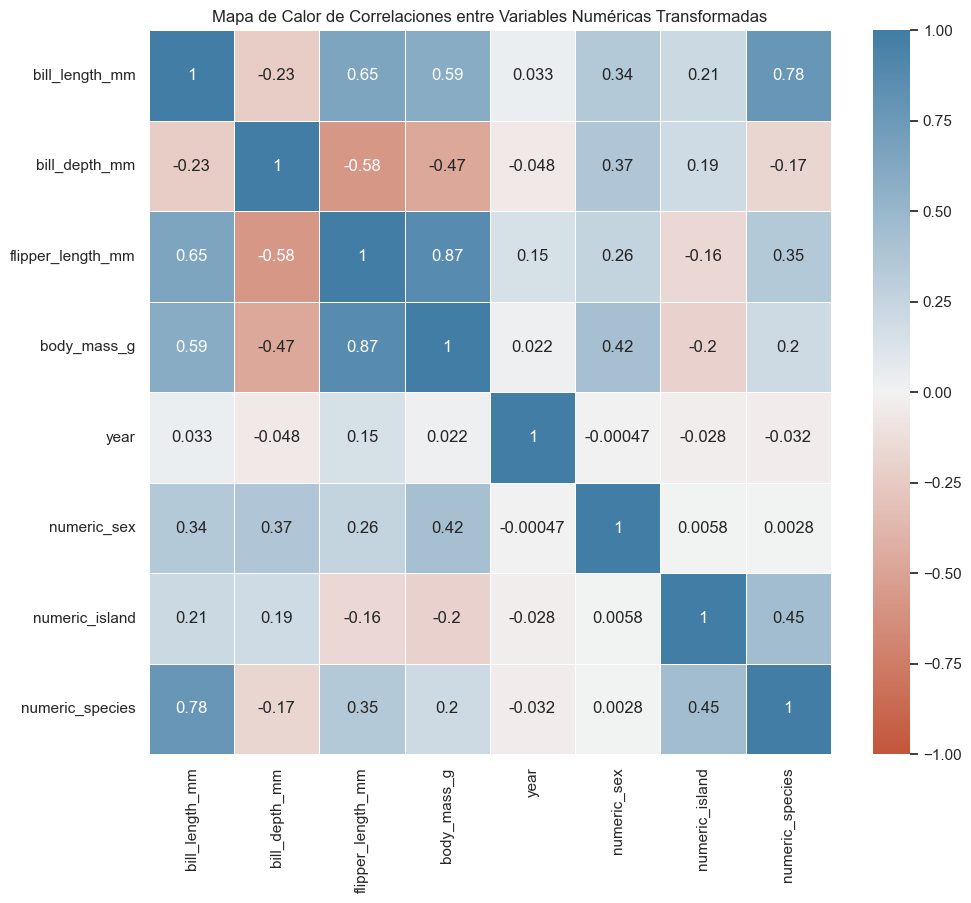

In [49]:
# Mapa de calor de la correlación entre variables numéricas transformadas
# Visualizamos las correlaciones entre las variables numéricas, incluyendo las variables categóricas convertidas en numéricas.
# Este análisis nos ayuda a identificar posibles relaciones entre las características transformadas.

sns.heatmap(
    data=penguins_2_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True,  # Mostrar valores de correlación en cada celda
)

# Personalización del gráfico
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas Transformadas")
plt.show()

#### Mapa de Calor de Correlaciones entre Variables Numéricas Transformadas

Este mapa de calor muestra las correlaciones entre las variables numéricas, incluidas las variables transformadas (`numeric_sex`, `numeric_island`, y `numeric_species`):

- **Correlaciones Fuertes con `numeric_species`**:
  - `bill_length_mm` (0.78) y `flipper_length_mm` (0.35) muestran correlaciones positivas moderadas a fuertes con `numeric_species`, indicando que la longitud del pico y de la aleta varían significativamente entre especies.
  - `numeric_island` también está moderadamente correlacionado con `numeric_species` (0.45), lo cual sugiere que la distribución de especies varía entre islas.

- **Correlaciones de `numeric_sex`**:
  - `numeric_sex` presenta correlaciones moderadas con `body_mass_g` (0.42) y `bill_depth_mm` (0.37), lo que indica que la masa corporal y la profundidad del pico podrían estar relacionadas con el sexo de los pingüinos.

- **Otras Correlaciones**:
  - Las correlaciones entre las características físicas (`bill_length_mm`, `flipper_length_mm`, y `body_mass_g`) permanecen fuertes y consistentes con el análisis previo.
  - Las variables de año (`year`) no muestran una correlación significativa con las características físicas o categóricas, indicando estabilidad temporal en las características de la población.

**Conclusión**: La transformación de variables categóricas confirma patrones de correlación significativos. La longitud del pico y de la aleta están fuertemente asociadas con la especie, mientras que la masa corporal y la profundidad del pico están parcialmente relacionadas con el sexo. Además, existe una relación entre la distribución de especies y la isla de procedencia, lo que podría reflejar adaptaciones ecológicas específicas.


___
## Conclusión General del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos realizado en el dataset de pingüinos revela patrones y relaciones clave entre las características físicas de los pingüinos y su clasificación por especie, sexo y ubicación geográfica (isla). A continuación se resumen los hallazgos principales y se sugieren algunos pasos adicionales para profundizar el análisis.

#### Resumen de Hallazgos

1. **Distribución de Características Físicas por Especie**:
   - Las especies de pingüinos presentan características físicas distintivas:
     - **Gentoo** es la especie más grande, con aletas más largas y mayor masa corporal.
     - **Chinstrap** tiene picos más largos, mientras que **Adelie** presenta mayor profundidad de pico.
   - Estas diferencias sugieren adaptaciones ecológicas específicas, que pueden ayudar en la identificación y estudio de las especies.

2. **Variación por Isla**:
   - Las islas de procedencia también muestran diferencias en las características físicas de los pingüinos:
     - **Biscoe** tiene la mayor diversidad en tamaño, mientras que **Torgersen** muestra picos más profundos y cortos.
   - La relación entre la distribución de especies y la isla sugiere posibles variaciones ecológicas o de hábitat que afectan a las especies de manera distinta.

3. **Correlaciones Entre Variables**:
   - Se observa una fuerte correlación entre la longitud de la aleta y la masa corporal, lo cual indica que el tamaño general del pingüino influye en ambas características.
   - La profundidad del pico muestra menor correlación con otras características físicas, lo cual podría indicar que esta variable está influenciada por factores externos, como la dieta.
   - Las variables categóricas, como la especie y la isla, también presentan correlaciones significativas con algunas características físicas, como el tamaño del pico y la masa corporal.

4. **Distribución Temporal**:
   - Las características físicas de los pingüinos no varían significativamente a lo largo del tiempo (2007-2009), lo que indica estabilidad en la estructura de la población en el periodo de estudio.

#### Siguientes Pasos

1. **Análisis Predictivo**:
   - Desarrollar modelos de clasificación para predecir la especie de un pingüino en función de sus características físicas. Las diferencias entre especies identificadas en el EDA pueden servir como variables predictivas clave.

2. **Análisis de Clústeres**:
   - Implementar un análisis de clústeres para verificar si las especies de pingüinos se agrupan naturalmente en función de sus características físicas, sin la información explícita de su clasificación. Esto podría validar la robustez de los patrones observados.

3. **Investigación de Factores Ecológicos**:
   - Explorar cómo las características físicas pueden estar relacionadas con el hábitat o el tipo de dieta de cada especie de pingüino. Esto podría realizarse a través de investigaciones adicionales o mediante la integración de datos externos, como información sobre el entorno de cada isla.

4. **Análisis Multivariado**:
   - Profundizar en el análisis multivariado (como análisis de componentes principales) para reducir la dimensionalidad de los datos y explorar combinaciones de variables que maximicen la diferenciación entre especies y entre islas.